<h3><center>M13 Practical Challenge: Using Neural Nets to Predict Sharing of Online News Articles
    <br>By Anna Imhoff, Randy Leon, and Jinming Chen</h3></center>

<h3><b>Introduction</b></h3>

The [Online News Popularity Data Set](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity) used for this exercise is part of the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php).  First, we will upload the data set to our Github repository.  The original data set contains 39,644 observations and 61 attributes.  The response variable will be a variable that we create called share_level based on the number of shares.  Exploratory data analysis will be performed on the variables to familiarize us with the online news data set, identify trends and missing data, and gather preliminary predictive inferences.  The number of explanatory variables is relatively large with respect to the number of observations contained within a data set.  We will apply feature selection and/or dimensionality reduction techniques to identify the explanatory variables to be included in our model.  Then, we will use neural network models with varying hyperparameters to classify the share_level for a given online news article.

Data Dictionary

0. url: URL of the article (non-predictive) (**categorical**) <br>
1. timedelta: Days between the article publication and the dataset acquisition (non-predictive) (**numeric, discrete**)
2. n_tokens_title: Number of words in the title (**numeric, discrete**)
3. n_tokens_content: Number of words in the content (**numeric, discrete**)
4. n_unique_tokens: Rate of unique words in the content (**numeric, continuous**)
5. n_non_stop_words: Rate of non-stop words in the content (**numeric, continuous**)
6. n_non_stop_unique_tokens: Rate of unique non-stop words in the content (**numeric, continuous**) Stop words are the most common words in any natural language.  They might not add much value to the meaning of the document.  Generally, the most common stop words used in a text are “the”, “is”, “in”, “for”, “where”, “when”, “to”, “at” etc. <br>
Source: https://www.analyticsvidhya.com/blog/2019/08/how-to-remove-stopwords-text-normalization-nltk-spacy-gensim-python/<br>
7. num_hrefs: Number of links (**numeric, discrete**)
8. num_self_hrefs: Number of links to other articles published by Mashable (**numeric, discrete**)
9. num_imgs: Number of images (**numeric, discrete**)
10. num_videos: Number of videos (**numeric, discrete**)
11. average_token_length: Average length of the words in the content (**numeric, continuous**)
12. num_keywords: Number of keywords in the metadata (**numeric, discrete**)
13. data_channel_is_lifestyle: Is data channel 'Lifestyle'? (**categorical**) <br>
14. data_channel_is_entertainment: Is data channel 'Entertainment'? (**categorical**) <br>
15. data_channel_is_bus: Is data channel 'Business'? (**categorical**) <br>
16. data_channel_is_socmed: Is data channel 'Social Media'? (**categorical**) <br>
17. data_channel_is_tech: Is data channel 'Tech'? (**categorical**) <br>
18. data_channel_is_world: Is data channel 'World'? (**categorical**) <br>
19. kw_min_min: Worst keyword (min. shares) (**numeric, discrete**)
20. kw_max_min: Worst keyword (max. shares) (**numeric, continuous**)
21. kw_avg_min: Worst keyword (avg. shares) (**numeric, continuous**)
22. kw_min_max: Best keyword (min. shares) (**numeric, discrete**)
23. kw_max_max: Best keyword (max. shares) (**numeric, discrete**)
24. kw_avg_max: Best keyword (avg. shares) (**numeric, continuous**)
25. kw_min_avg: Avg. keyword (min. shares) (**numeric, continuous**)
26. kw_max_avg: Avg. keyword (max. shares) (**numeric, continuous**)
27. kw_avg_avg: Avg. keyword (avg. shares) (**numeric, continuous**)
28. self_reference_min_shares: Min. shares of referenced articles in Mashable (**numeric, continuous**)
29. self_reference_max_shares: Max. shares of referenced articles in Mashable (**numeric, continuous**)
30. self_reference_avg_sharess: Avg. shares of referenced articles in Mashable (**numeric, continuous**)
31. weekday_is_monday: Was the article published on a Monday? (**categorical**) <br>
32. weekday_is_tuesday: Was the article published on a Tuesday? (**categorical**) <br>
33. weekday_is_wednesday: Was the article published on a Wednesday? (**categorical**) <br>
34. weekday_is_thursday: Was the article published on a Thursday? (**categorical**) <br>
35. weekday_is_friday: Was the article published on a Friday? (**categorical**) <br>
36. weekday_is_saturday: Was the article published on a Saturday? (**categorical**) <br>
37. weekday_is_sunday: Was the article published on a Sunday? (**categorical**) <br>
38. is_weekend: Was the article published on the weekend? (**categorical**) <br>
39. LDA_00: Closeness to LDA topic 0 (**numeric, continuous**)
40. LDA_01: Closeness to LDA topic 1 (**numeric, continuous**)
41. LDA_02: Closeness to LDA topic 2 (**numeric, continuous**)
42. LDA_03: Closeness to LDA topic 3 (**numeric, continuous**)
43. LDA_04: Closeness to LDA topic 4 (**numeric, continuous**)
44. global_subjectivity: Text subjectivity (**numeric, continuous**)
45. global_sentiment_polarity: Text sentiment polarity (**numeric, continuous**)
46. global_rate_positive_words: Rate of positive words in the content (**numeric, continuous**)
47. global_rate_negative_words: Rate of negative words in the content (**numeric, continuous**)
48. rate_positive_words: Rate of positive words among non-neutral tokens (**numeric, continuous**)
49. rate_negative_words: Rate of negative words among non-neutral tokens (**numeric, continuous**)
50. avg_positive_polarity: Avg. polarity of positive words (**numeric, continuous**)
51. min_positive_polarity: Min. polarity of positive words (**numeric, continuous**)
52. max_positive_polarity: Max. polarity of positive words (**numeric, continuous**)
53. avg_negative_polarity: Avg. polarity of negative words (**numeric, continuous**)
54. min_negative_polarity: Min. polarity of negative words (**numeric, continuous**)
55. max_negative_polarity: Max. polarity of negative words  (**numeric, continuous**)
56. title_subjectivity: Title subjectivity (**numeric, continuous**)
57. title_sentiment_polarity: Title polarity (**numeric, continuous**)
58. abs_title_subjectivity: Absolute subjectivity level (**numeric, continuous**)
59. abs_title_sentiment_polarity: Absolute polarity level (**numeric, continuous**)
60. shares: Number of shares (target) (**numeric, discrete**)

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#Read in the csv from github
df = pd.read_csv("https://raw.githubusercontent.com/annaimhoff/DAV-6150/main/M4_Data.csv", sep=',')
                 
#View the data frame to ensure that the desired columns were selected
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [2]:
#Drop the url and timedelta columns since they are non-predictive
df = df.drop(df.columns[[0, 1]], axis=1)

#View the data frame to ensure that the columns were removed
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12,219,0.663594,1.0,0.815385,4,2,1,0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9,255,0.604743,1.0,0.791946,3,1,1,0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9,211,0.575130,1.0,0.663866,3,1,1,0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9,531,0.503788,1.0,0.665635,9,0,1,0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13,1072,0.415646,1.0,0.540890,19,19,20,0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


<h3><b>Exploratory Data Analysis</b></h3>

In [3]:
#Find the number of rows and columns in the data set.
df.shape

(39644, 59)

In [4]:
#View df object types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 59 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0    n_tokens_title                 39644 non-null  int64  
 1    n_tokens_content               39644 non-null  int64  
 2    n_unique_tokens                39644 non-null  float64
 3    n_non_stop_words               39644 non-null  float64
 4    n_non_stop_unique_tokens       39644 non-null  float64
 5    num_hrefs                      39644 non-null  int64  
 6    num_self_hrefs                 39644 non-null  int64  
 7    num_imgs                       39644 non-null  int64  
 8    num_videos                     39644 non-null  int64  
 9    average_token_length           39644 non-null  float64
 10   num_keywords                   39644 non-null  int64  
 11   data_channel_is_lifestyle      39644 non-null  int64  
 12   data_channel_is_entertainment  

In [5]:
#Find the count, mean, standard deviation, minimum, maximum, 25%, 50% and 75% of each variable in the dataset.
df.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [6]:
#Find the number of null values.
df.isna().sum()

 n_tokens_title                   0
 n_tokens_content                 0
 n_unique_tokens                  0
 n_non_stop_words                 0
 n_non_stop_unique_tokens         0
 num_hrefs                        0
 num_self_hrefs                   0
 num_imgs                         0
 num_videos                       0
 average_token_length             0
 num_keywords                     0
 data_channel_is_lifestyle        0
 data_channel_is_entertainment    0
 data_channel_is_bus              0
 data_channel_is_socmed           0
 data_channel_is_tech             0
 data_channel_is_world            0
 kw_min_min                       0
 kw_max_min                       0
 kw_avg_min                       0
 kw_min_max                       0
 kw_max_max                       0
 kw_avg_max                       0
 kw_min_avg                       0
 kw_max_avg                       0
 kw_avg_avg                       0
 self_reference_min_shares        0
 self_reference_max_shares  

There are no null values in the dataset.

In [7]:
#Find the number of unique values for each variable
df.nunique(axis=0)

 n_tokens_title                      20
 n_tokens_content                  2406
 n_unique_tokens                  24878
 n_non_stop_words                    52
 n_non_stop_unique_tokens         21253
 num_hrefs                          133
 num_self_hrefs                      59
 num_imgs                            91
 num_videos                          53
 average_token_length             30136
 num_keywords                        10
 data_channel_is_lifestyle            2
 data_channel_is_entertainment        2
 data_channel_is_bus                  2
 data_channel_is_socmed               2
 data_channel_is_tech                 2
 data_channel_is_world                2
 kw_min_min                          26
 kw_max_min                        1076
 kw_avg_min                       17003
 kw_min_max                        1021
 kw_max_max                          35
 kw_avg_max                       30834
 kw_min_avg                       15982
 kw_max_avg                       19438


In [8]:
#Check for duplicates
df[df.duplicated()]

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares


There are no duplicate values in our data set.

Divide the data frame into two lists, one for categorical variables and the other for numeric, to look at the distributions of each of the attributes.

In [9]:
#Create lists of numerical and categorical attributes

col_cat=[' data_channel_is_lifestyle', ' data_channel_is_entertainment', ' data_channel_is_bus', ' data_channel_is_socmed', 
         ' data_channel_is_tech', ' data_channel_is_world', ' weekday_is_monday', ' weekday_is_tuesday', 
         ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday', 
         ' weekday_is_sunday', ' is_weekend']

col_num=[' n_tokens_title', ' n_tokens_content', ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens', 
         ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length', ' num_keywords', 
         ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg', 
         ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares', ' self_reference_max_shares', 
         ' self_reference_avg_sharess', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity', 
         ' global_sentiment_polarity', ' global_rate_positive_words', ' global_rate_negative_words', ' rate_positive_words',
         ' rate_negative_words', ' avg_positive_polarity', ' min_positive_polarity', ' max_positive_polarity', 
         ' avg_negative_polarity', ' min_negative_polarity', ' max_negative_polarity', ' title_subjectivity', 
         ' title_sentiment_polarity', ' abs_title_subjectivity', ' abs_title_sentiment_polarity', ' shares']

print("# of categorical attributes:%s" %len(col_cat))
print("# of numeric attributes:%s" %len(col_num))

# of categorical attributes:14
# of numeric attributes:45


<h4><b>Bar Charts, Histograms and Boxplots</b></h4>

Plot a bar chart for each of the categorical attributes.

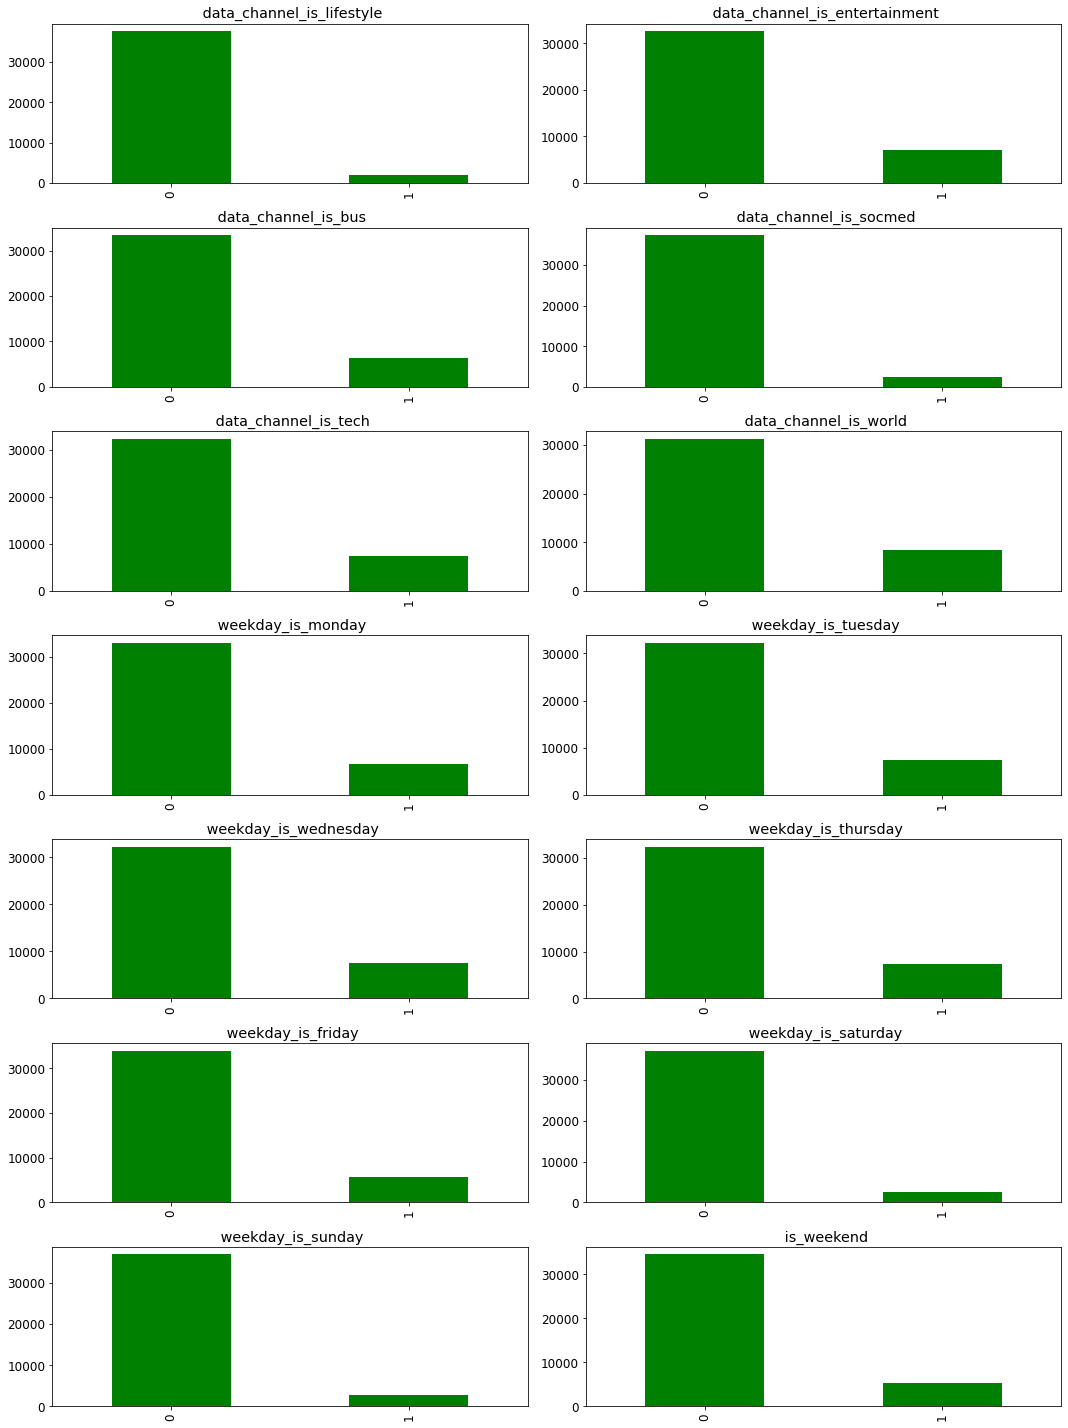

In [10]:
#Set plot parameters
plt.rcParams.update({'font.size': 12,'figure.figsize':(15,20)}) 

#Use an index to identify the spot of the subplot
j=1

#For each categorical column 
for k in col_cat :   
    plt.subplot(7,2,j) 
    df[k].value_counts().plot(kind='bar', color='green');
    plt.title('%s' %k)
    
#Add 1 to go to the next subplot space
    j=j+1 

plt.tight_layout()

#Show results    
plt.show()

The most common observation for all of the categorical attributes is 0.

1) data_channel_is_lifestyle is 95% 0 and 5% 1.<br>
2) data_channel_is_entertainment is 82% 0 and 18% 1.<br>
3) data_channel_is_bus is 84& 0 and 16% 1.<br>
4) data_channel_is_socmed is 94% 0 and 6% 1.<br>
5) data_channel_is_tech is 81% 0 and 19% 1.<br>
6) data_channel_is_world is 79% 0 and 21% 1.<br>

7) weekday_is_monday is 83% 0 and 17% 1.<br>
8) weekday_is_tuesday is 81% 0 and 19% 1.<br>
9) weekday_is_wednesday is 81% 0 and 19% 1.<br>
10) weekday_is_thursday is 82% 0 and 18% 1.<br>
11) weekday_is_friday is 86% 0 and 14% 1.<br>
12) weekday_is_saturday is 94% 0 and 6% 1.<br>
13) weekday_is_sunday is 93% 0 and 7% is 1.<br>
14) is_weekend is 87% 0 and 13% 1.<br>

Plot a histogram for each of our numerical attributes.

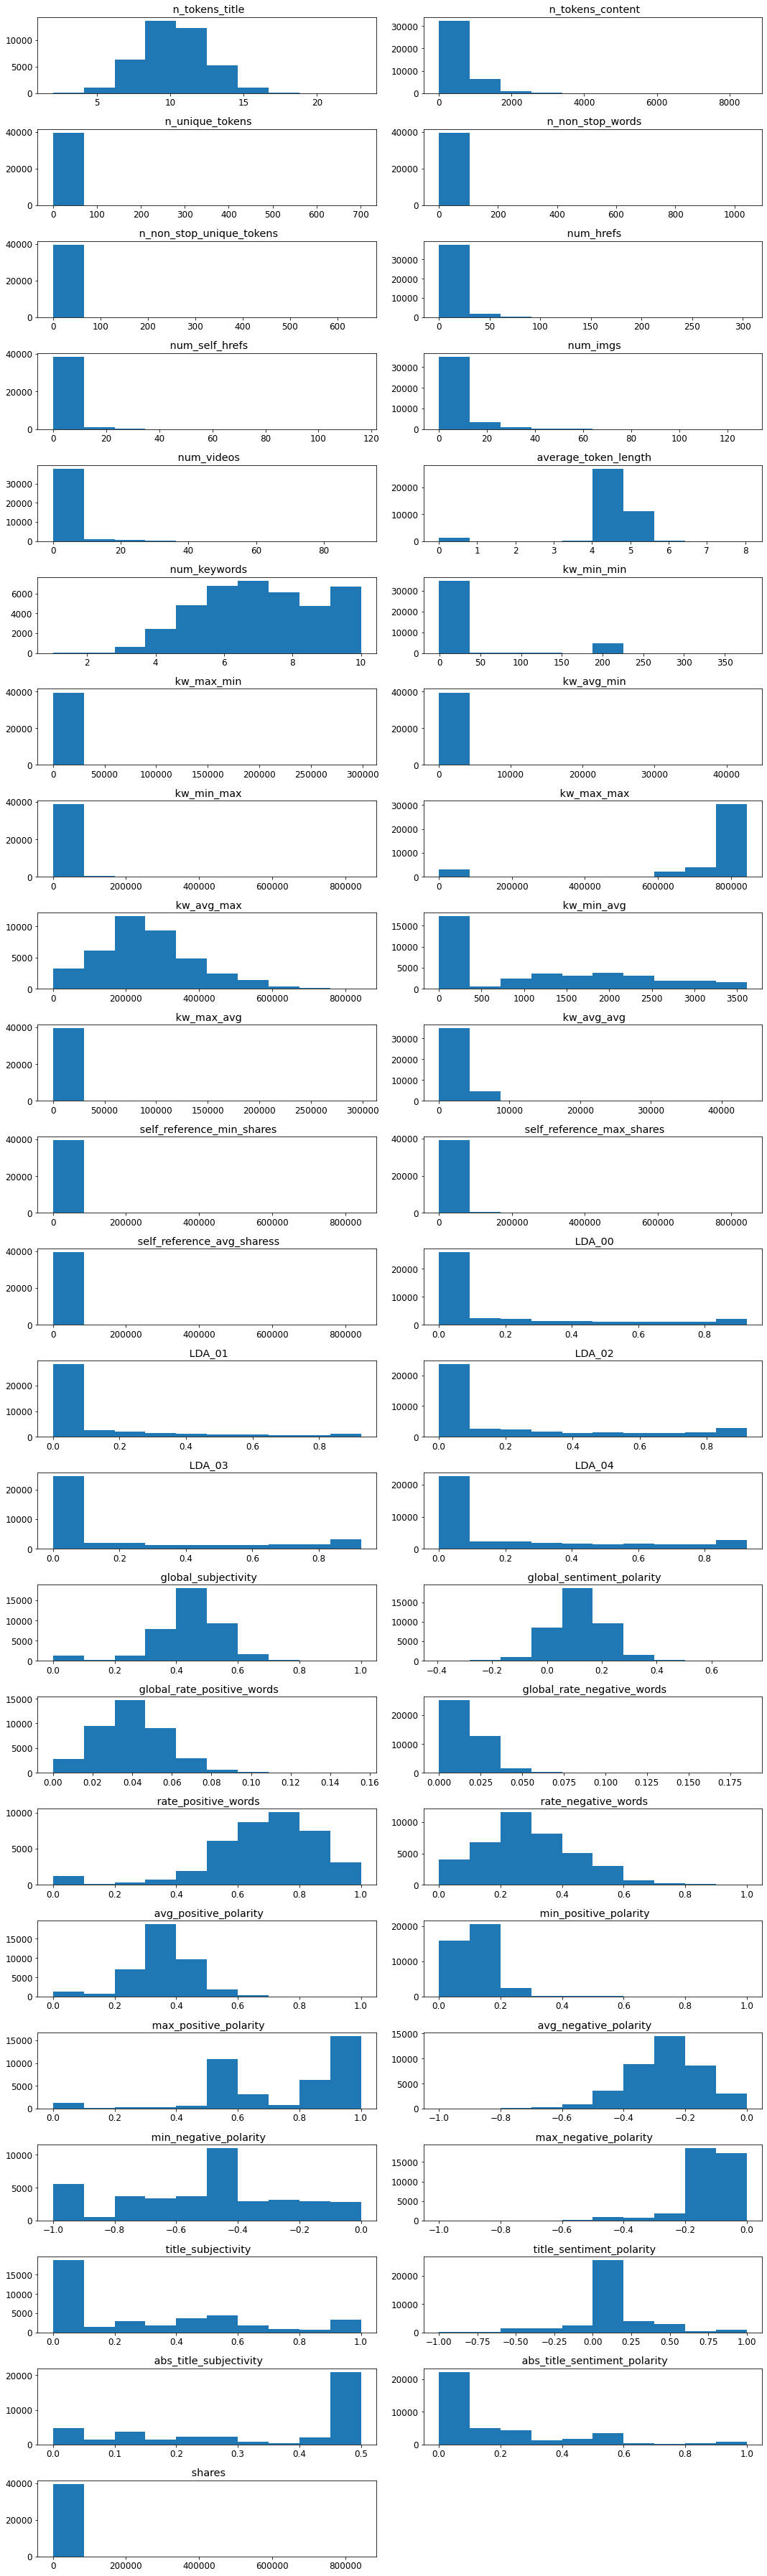

In [11]:
#Set plot parameters
plt.rcParams.update({'font.size': 12,'figure.figsize':(15,50)}) 

#Ignore warnings
np.warnings.filterwarnings('ignore')

#Use an index to identify the spot of the subplot
j=1

#For each numerical column 
for k in col_num :   
    plt.subplot(23,2,j) 
    plt.hist(df[k])
    plt.title('%s' %k)
    j=j+1 

plt.tight_layout()

#Show results    
plt.show()

1) n_tokens_title histogram has large peaks at 9, 10, 11 and 12 with 10 being the mode.<br>
2) n_tokens_content histogram is right skewed with a mode of 0. <br>
3) n_unique_tokens histogram is right skewed with a mode of 0.  <br>
4) n_non_stop_words histogram is right skewed with a mode of 0.  <br>
5) n_non_stop_unique_tokens histogram is right skewed with a mode of 0.  <br>

6) num_hrefs histogram is right skewed with a mode of 4. <br>
7) num_self_hrefs histogram is right skewed with a mode of 2. <br>
8) num_imgs boxplot histogram is right skewed with a mode of 1. <br>
9) num_videos boxplot histogram is right skewed with a mode of 0. <br>
10) average_token_length histogram is bell-shaped with a peak round 4.75.  The mode is 0. <br>
11) num_keywords boxplot histogram is left skewed with a mode of 7 and high peaks at 6 and 10. <br>

12) kw_min_min histogram only shows two peaks at -1 and 217.  The mode is -1. <br>
13) kw_max_min histogram is right skewed with a mode of 1,100.<br>
14) kw_avg_min histogram is right skewed with a mode of -1.<br>
15) kw_min_max histogram is right skewed with a mode of 0<br>
16) kw_max_max histogram is left skewed with a mode of 843,300.<br>
17) kw_avg_max histogram is right skewed with a mode of 0.<br>
18) kw_min_avg histogram is right skewed with a mode of 0.<br>
19) kw_max_avg histogram is right skewed with a mode of 0.<br>
20) kw_avg_avg histogram is right skewed with a mode of 0.<br>

21) self_reference_min_shares histogram is right skewed with a mode of 0.<br>
22) self_reference_max_shares histogram is right skewed with a mode of 0. <br>
23) self_reference_avg_sharess histogram is right skewed with a mode of 0.<br>

24) LDA_00 histogram is right skewed with a mode of 0.067.<br>
25) LDA_01 histogram is right skewed with a mode of 0.067.<br>
26) LDA_02 histogram is right skewed with a mode of 0.733.<br>
27) LDA_03 histogram is right skewed with a mode of 0.067.<br>
28) LDA_04 histogram is right skewed with a mode of 0.05.<br>

29) global_subjectivity is right skewed with a mode of 0.05.<br>
30) global_sentiment_polarity is bell-shaped, peaking at 0.15, but with an even higher peak at 0 which is also the mode.<br>
31) global_rate_positive_words histogram is bell-shaped with a mode of 0.042 but also had a high peak at 0 which is outside the bell curve.<br>
32) global_rate_negative_words histogram is bell-shaped but right skewed.  The mode is 0 which is a large peak outside of the bell curve.<br>
33) rate_positive_words histogram is mostly bell-shaped but left skewed with several large peaks.  The mode is 0.67 with the next highest peak at 1.<br>
34) rate_negative_words histogram is mostly bell-shaped but right skewed with several large peaks.  The mode is 0, which is outside the bell-shaped curve, with the next highest peak at 0.33.<br>

35) avg_positive_polarity histogram is bell-shaped but with a mode of 0 which is outside the bell curve.<br>
36) min_positive_polarity histogram has the highest peak at 0.1 and the next highest peak at 0.03.<br>
37) max_positive_polarity histogram shows a mode of 1 and the next highest peak at 0.5.<br>
38) avg_negative_polarity histogram is bell-shaped with a left skew.  The mode is 0 which is outside the bell-shaped curve.<br>
39) min_negative_polarity histogram shows a mode of -0.5 with the next highest peak at -1. <br>
40) max_negative_polarity histogram shows a mode of -0.05 with the next highest peak at -0.1. <br>

41) title_subjectivity histogram shows a mode of 0 with the next highest peak at 0.5. <br>
42) title_sentiment_polarity bhistogram shows a mode of 0 with the next highest peak at 0.5. <br>
43) abs_title_subjectivity histogram shows a mode of 0.5 with the next highest peak at 0. <br>
44) abs_title_sentiment_polarity histogram shows a mode of 0 with the next highest peak at 0.5. <br>

45) shares histogram is right skewed and shows a mode of 1,100 with the next highest peak at 1,200. <br>

We will now check the boxplots for outliers.

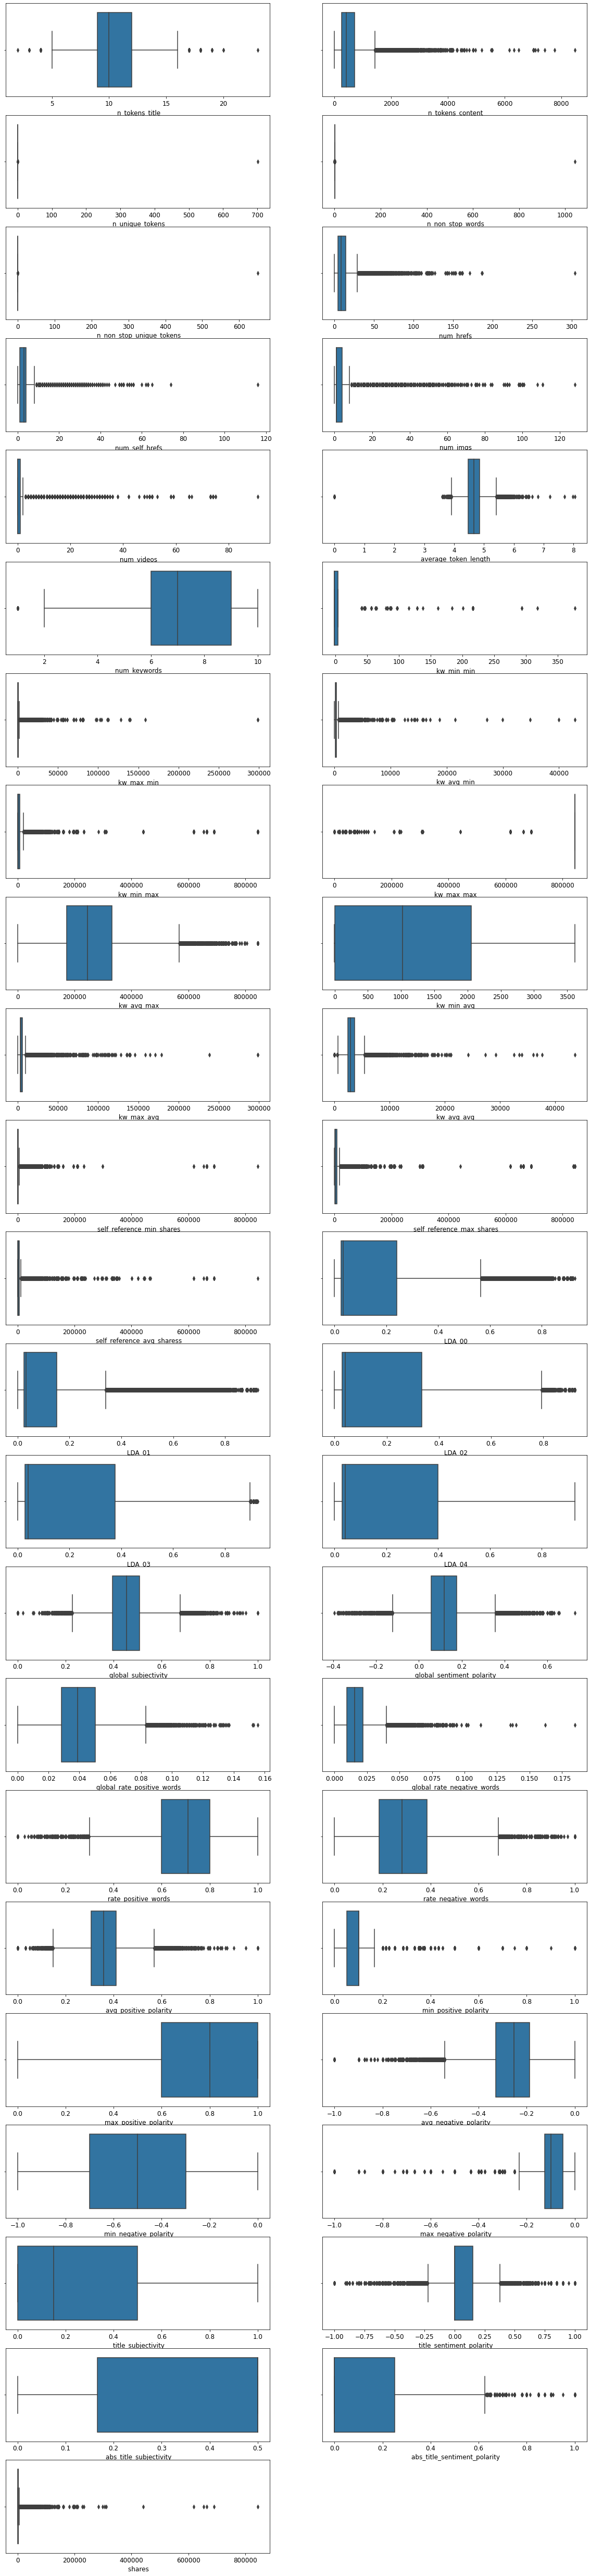

In [12]:
#Define a figure to which we will add a boxplot for each of our attributes
plt.figure(figsize=(20,90))

#Ignore warnings
np.warnings.filterwarnings('ignore')

#Use an index to identify the spot of the subplot
j=1

#For each numeric variable display a boxplot
for k in col_num :    
    plt.subplot(23,2,j) 
    sns.boxplot(x=k, data=df);
    j=j+1

#Show results    
plt.show()

1) n_tokens_title boxplot shows the median value is 10.  Q1 to Q3 is 9-12 with outliers as low as 2 and as high as 23.  <br>
2) n_tokens_content boxplot shows the median value is 409.  Q1 to Q3 is 246-716 with outliers as low as 0 and as high as 8,474. <br>
3) n_unique_tokens boxplot shows the median value is 0.54.  Q1 to Q3 is 0.47 - 0.61 with outliers as low as 0 and as high as 701.  <br>
4) n_non_stop_words boxplot shows the median value is 1 with an outlier at 1,042.<br>
5) n_non_stop_unique_tokens boxplot shows the median value is 0.69.  Q1 to Q3 is 0.63 - 0.75 with an outlier at 650.<br>

6) num_hrefs boxplot shows the median value is 8.  Q1 to Q3 is 4-14 with outliers as low as 0 and as high as 304.  <br>
7) num_self_hrefs boxplot shows the median value is 3.  Q1 to Q3 is 1-4 with outliers as low as 0 and as high as 116.  <br>
8) num_imgs boxplot shows the median value is 1.  Q1 to Q3 is 1-4 with outliers as low as 0 and as high as 128.  <br>
9) num_videos boxplot shows the median value is 0.  Q1 to Q3 is 0-1 with outliers as high as 91.   <br>
10) average_token_length boxplot shows the median value is 4.66.  Q1 to Q3 is 4.48-4.85 with outliers as low as 0 and as high as 8.04.  <br>
11) num_keywords boxplot shows the median value is 7.  Q1 to Q3 is 6-9 with outliers as low as 1 and as high as 10.  <br>

12) kw_min_min boxplot shows the median value is -1. Q1 to Q3 is -1 to 4 with outliers as high as 217. <br>
13) kw_max_min boxplot shows the median value is 660. Q1 to Q3 is 445 - 1,000 with outliers as low as 0 and as high as 298,400. <br>
14) kw_avg_min<br>
15) kw_min_max<br>
16) kw_max_max boxplot shows the median value is 843,300. Q1 to Q3 is 843,300 - 843,300 with outliers as low as 0. <br>
17) kw_avg_max boxplot shows the median value is 244,570. Q1 to Q3 is 172,850 - 330,980 with outliers as low as 0 and as high as 843,300. <br>
18) kw_min_avg boxplot shows the median value is 1,023.6. Q1 to Q3 is 0 - 2,056.8 with outliers as low as -1 and as high as 3,613. <br>
19) kw_max_avg boxplot shows the median value is 4,355.7. Q1 to Q3 is 3,562.1 - 6020 with outliers as low as 0 and as high as 298,400. <br>
20) kw_avg_avg boxplot shows the median value is 2,870.1. Q1 to Q3 is 2,382.4 - 3,600.2 with outliers as low as 0 and as high as 435,568. <br>

21) self_reference_min_shares boxplot shows the median value is 1,200. Q1 to Q3 is 639 - 2,600 with outliers as low as 0 and as high as 843,330. <br>
22) self_reference_max_shares boxplot shows the median value is 2,800. Q1 to Q3 is 1,100 - 8,000 with outliers as low as 0 and as high as 843,330. <br>
23) self_reference_avg_sharess boxplot shows the median value is 2,200. Q1 to Q3 is 981.2 - 5,200 with outliers as low as 0 and as high as 843,330. <br>

24) LDA_00 boxplot shows the median value is 0.033. Q1 to Q3 is 0.025 - 0.24 with outliers as low as 0 and as high as 0.93. <br>
25) LDA_01 boxplot shows the median value is 0.033. Q1 to Q3 is 0.025 - 0.15 with outliers as low as 0 and as high as 0.93. <br>
26) LDA_02 boxplot shows the median value is 0.04. Q1 to Q3 is 0.029 - 0.33 with outliers as low as 0 and as high as 0.92. <br>
27) LDA_03 boxplot shows the median value is 0.04. Q1 to Q3 is 0.029 - 0.38 with outliers as low as 0 and as high as 0.92. <br>
28) LDA_04 boxplot shows the median value is 0.04. Q1 to Q3 is 0.029 - 0.4 with outliers as low as 0 and as high as 0.93. <br>

29) global_subjectivity boxplot shows the median value is 0.04. Q1 to Q3 is 0.029 - 0.4 with outliers as low as 0 and as high as 0.93. <br>
30) global_sentiment_polarity boxplot shows the median value is 0.12. Q1 to Q3 is 0.06 - 0.18 with outliers as low as -0.39 and as high as 0.73. <br>
31) global_rate_positive_words boxplot shows the median value is 0.04. Q1 to Q3 is 0.03 - 0.05 with outliers as low as 0 and as high as 0.16. <br>
32) global_rate_negative_words boxplot shows the median value is 0.02. Q1 to Q3 is 0.01 - 0.02 with outliers as low as 0 and as high as 0.18. <br>
33) rate_positive_words boxplot shows the median value is 0.71. Q1 to Q3 is 0.6 - 0.8 with outliers as low as 0 and as high as 1. <br>
34) rate_negative_words boxplot shows the median value is 0.28. Q1 to Q3 is 0.19 - 0.38 with outliers as low as 0 and as high as 1. <br>

35) avg_positive_polarity boxplot shows the median value is 0.36. Q1 to Q3 is 0.31 - 0.41 with outliers as low as 0 and as high as 1. <br>
36) min_positive_polarity boxplot shows the median value is 0.1. Q1 to Q3 is 0.05 - 0.01 with outliers as low as 0 and as high as 1. <br>
37) max_positive_polarity boxplot shows the median value is 0.8. Q1 to Q3 is 0.6 - 1 with outliers as low as 0. <br>
38) avg_negative_polarity boxplot shows the median value is -0.25. Q1 to Q3 is -0.33 to -0.19 with outliers as low as -1 and as high as 0. <br>
39) min_negative_polarity boxplot shows the median value is -0.5. Q1 to Q3 is -0.7 to -0.3 with outliers as low as -1 and as high as 0. <br>
40) max_negative_polarity boxplot shows the median value is -0.1. Q1 to Q3 is -0.125 to -0.05 with outliers as low as -1 and as high as 0. <br>

41) The title_subjectivity boxplot shows the median value is 0.15. Q1 to Q3 is 0 to 0.5 with outliers as high as 1.  <br>
42) The title_sentiment_polarity boxplot shows the median value is 0. Q1 to Q3 is 0 to 0.15 with outliers as low as -1 and as high as 1. <br>
43) The abs_title_subjectivity boxplot shows the median value is 0.5. Q1 to Q3 is 0.17 to 0.5 with outliers as low as 0 and as high as 0.5. <br>
44) The abs_title_sentiment_polarity boxplot shows the median value is 0. Q1 to Q3 is 0 to 0.25 with outliers as high as 1. <br>

45) The number of shares boxplot shows the median value is 1,400. Q1 to Q3 is 946 to 2,800 with outliers as low as 1 and as high as 843,300. <br>

We see that there are some negative numbers in our dataset.

Check the correlation matrix to see if any numeric variables are highly correlated.

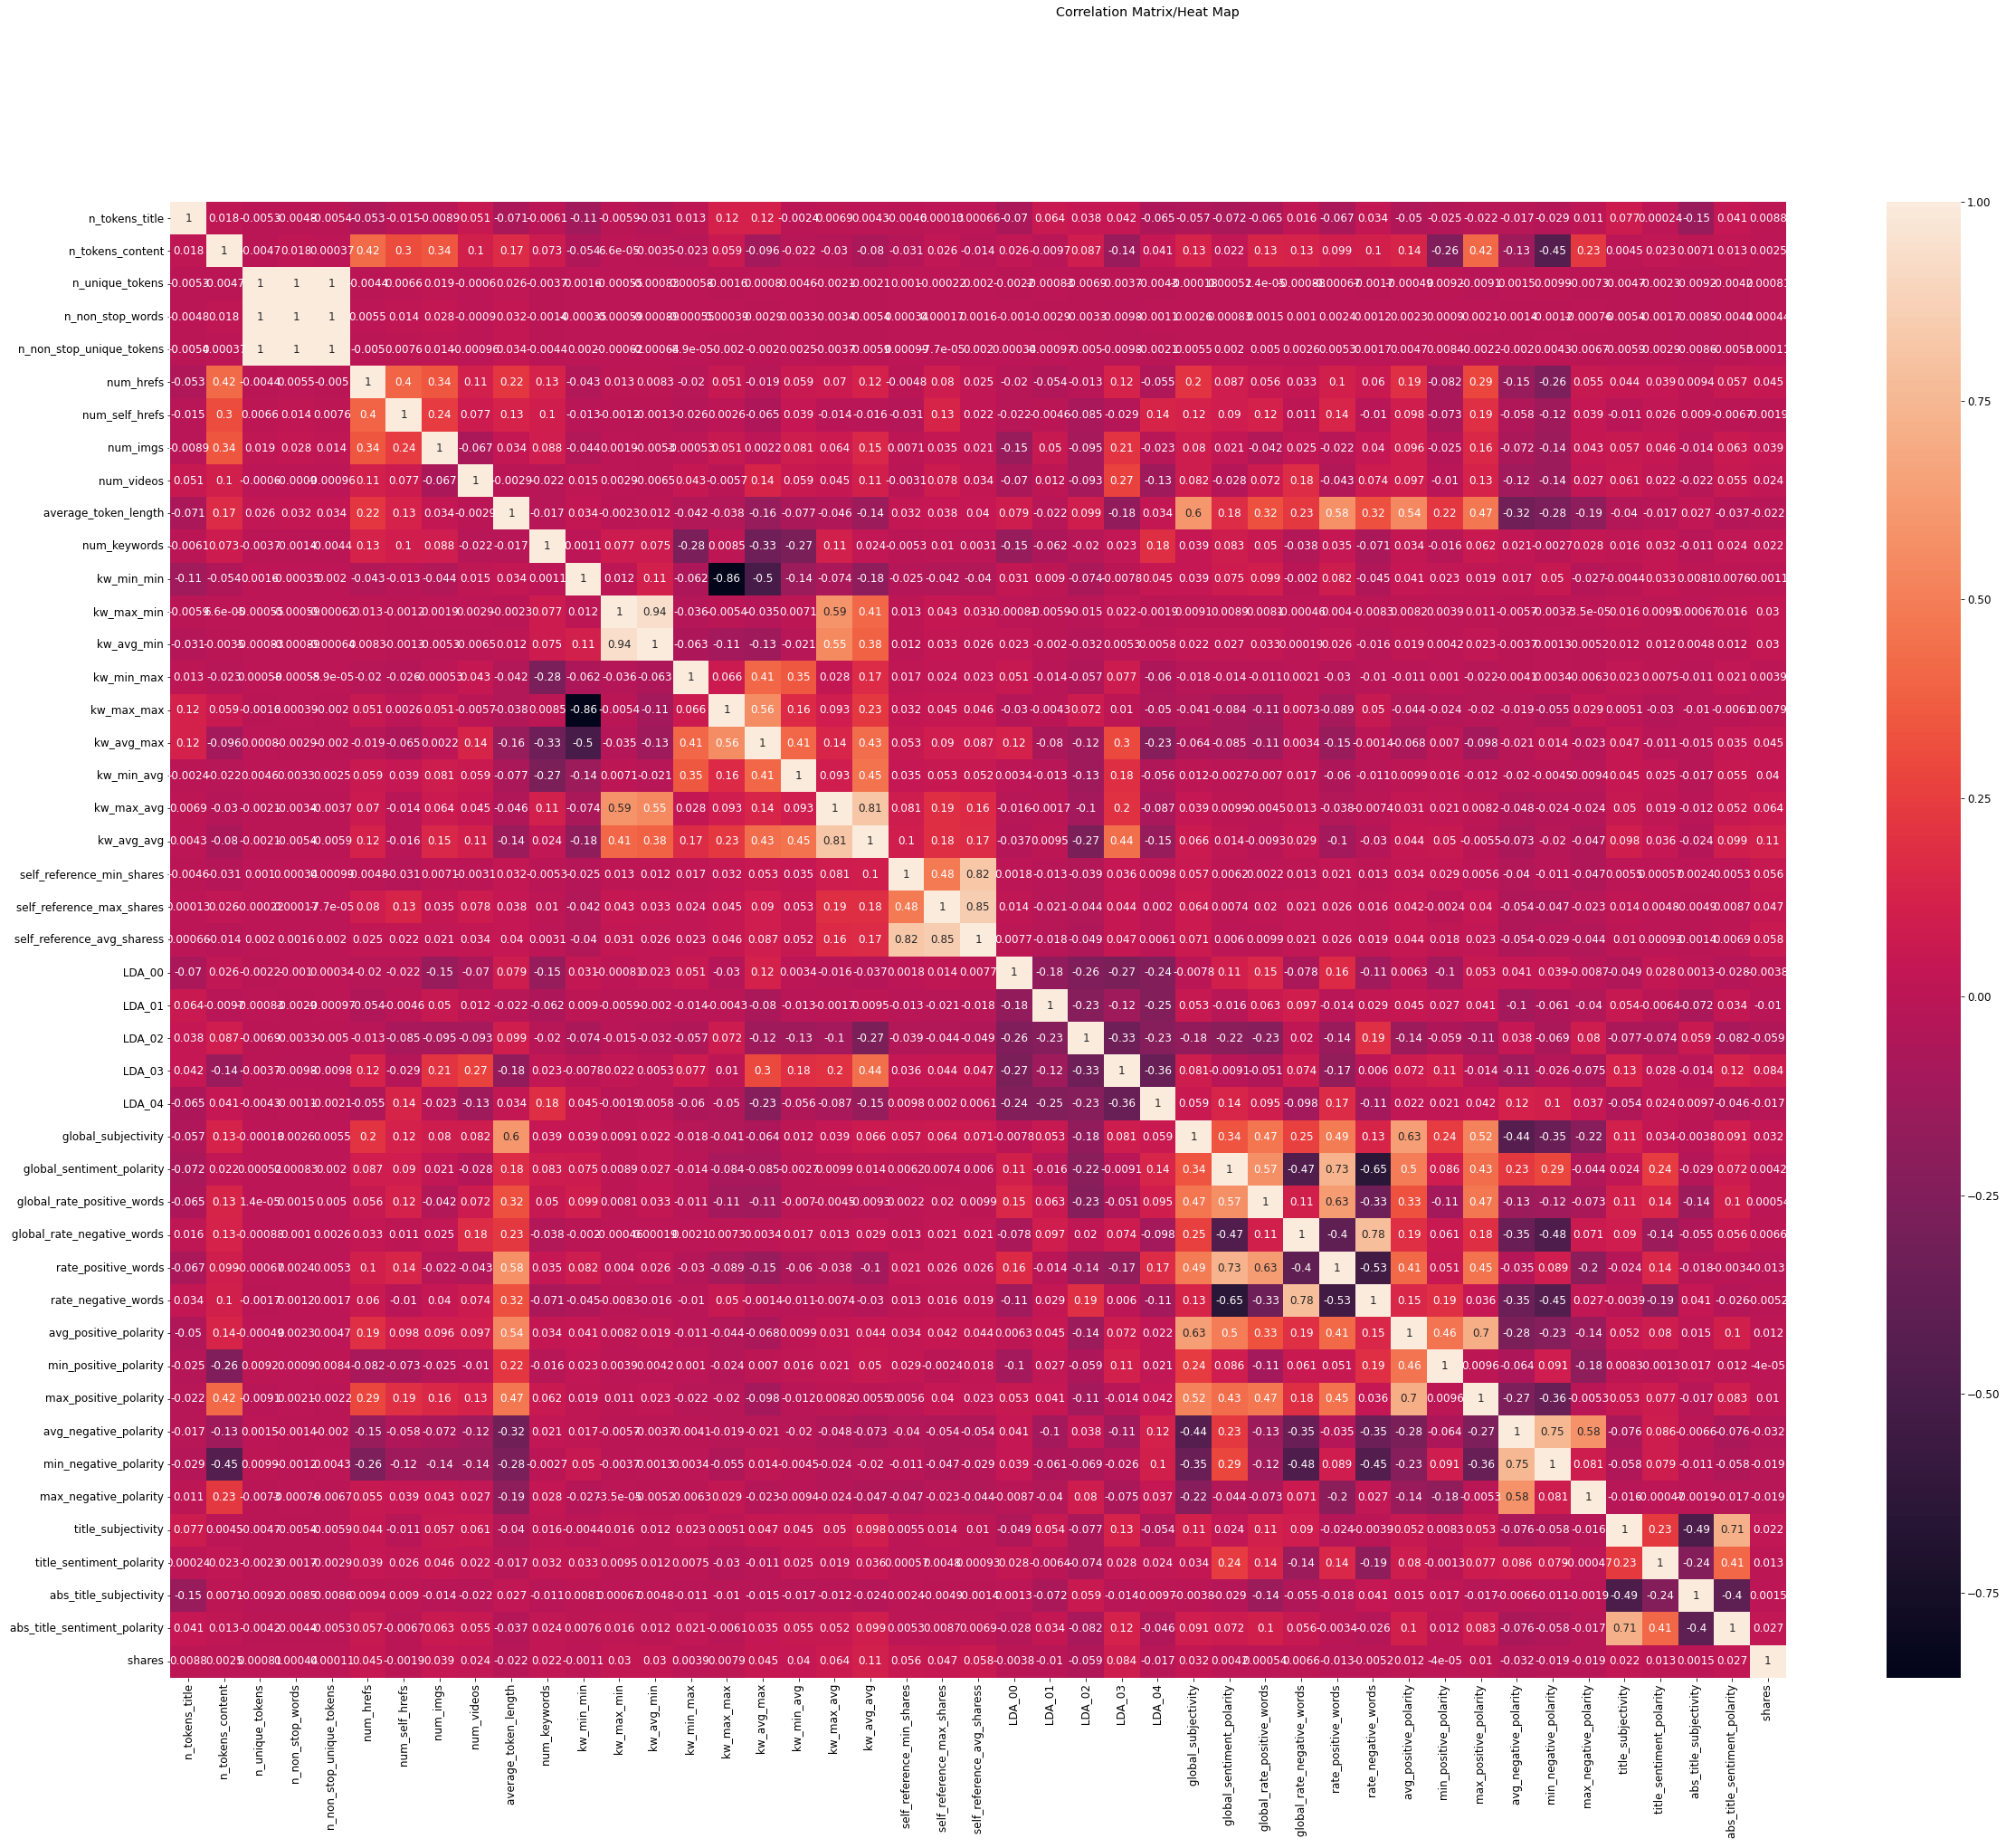

In [13]:
#Graph heat map for correlation
corr_num=df[col_num].corr()
fig = plt.figure(figsize=(40, 30))
sns.heatmap(corr_num, annot=True);
fig.suptitle('Correlation Matrix/Heat Map') 
plt.show()

1) n_non_stop_words is highly correlated with n_unique_tokens and n_non_stop_unique_tokens (ρ = 1).<br> 
2) n_non_stop_unique_tokens is highly correlated with n_unique_tokens and n_non_stop_words (ρ = 1). <br>
3) kw_avg_min is highly correlated with kw_max_min (ρ = 0.94).<br>
4) kw_max_max is highly correlated with kw_min_min (ρ = -0.86).<br>
5) kw_avg_avg is highly correlated with kw_max_avg (p = 0.81).<br>
6) self_reference_avg_shares is highly correlated with self_reference_min_shares (p = 0.82) and self_reference_max_shares (p = 0.85).<br>
7) rate_negative_words is highly correlated with global_rate_negative_words (p = 0.78).<br> 

According to our correlation matrix, none of the numeric explanatory variables are standing out as being very predictive of shares.  We will drop variables that are highly correlated with each other (ρ-value of greater than 0.75). 

<h3><b> Data Preparation</b></h3>

Create new categorical indicator variable which will be the response variable. First, find the median of shares.

In [14]:
df[' shares'].median()

1400.0

Add a column called 'share_level' with 'Low' if shares is less than 1/2 the median, 'High' if shares is 1.5 times the median, and 'Medium' if shares is greater than or equal to 1/2 the median but less or equal to 1.5 times the median.

In [15]:
numbers = df[' shares']

df.loc[df[' shares'] < (1400/2), 'share_level'] = 'low' 
df.loc[df[' shares'] > (1400*1.5), 'share_level'] = 'high' 
df.loc[(df[' shares'] >= (1400/2)) & (df[' shares'] <= (1400*1.5)), 'share_level'] = 'medium' 

print(df)

        n_tokens_title   n_tokens_content   n_unique_tokens  \
0                   12                219          0.663594   
1                    9                255          0.604743   
2                    9                211          0.575130   
3                    9                531          0.503788   
4                   13               1072          0.415646   
...                ...                ...               ...   
39639               11                346          0.529052   
39640               12                328          0.696296   
39641               10                442          0.516355   
39642                6                682          0.539493   
39643               10                157          0.701987   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
0                    1.0                   0.815385           4   
1                    1.0                   0.791946           3   
2                    1.0                  

Analyze the distribution of the newly created share_level indicator value.

In [16]:
df['share_level'].value_counts()

medium    22903
high      12955
low        3786
Name: share_level, dtype: int64

We see that the three categories, low, medium and high, are imbalanced.  There are 39,644 rows with a share_level value.  medium is ~58%, low is ~10%, and high makes up ~33% of the total share_level values.

Remove shares to eliminate the collinearity that will result from the addition of the share_level indicator.

In [17]:
#Drop shares
df = df.drop(df.columns[[58]], axis=1)

#View the data frame to ensure that the columns were removed
df.columns

Index([' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' gl

Drop attributes that are highly correlated (>0.75) with other attributes.

In [18]:
#Drop n_non_stop_words, n_non_stop_unique_tokens, kw_min_min, kw_max_min, kw_max_avg, self_reference_min_shares, 
#self_reference_max_shares, and global_rate_negative_words.

df = df.drop(df.columns[[3, 4, 17, 18, 24, 26, 27, 45]], axis=1)

#View the data frame to ensure that the columns were removed
df.columns

Index([' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_avg_min', ' kw_min_max', ' kw_max_max',
       ' kw_avg_max', ' kw_min_avg', ' kw_avg_avg',
       ' self_reference_avg_sharess', ' weekday_is_monday',
       ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday',
       ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday',
       ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04',
       ' global_subjectivity', ' global_sentiment_polarity',
       ' global_rate_positive_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
  

Standardize the data

In [19]:
#Numeric data to standardize

col_num2=[' n_tokens_title', ' n_tokens_content', ' n_unique_tokens', ' num_hrefs', ' num_self_hrefs', ' num_imgs', 
         ' num_videos', ' average_token_length', ' num_keywords', ' kw_avg_min', ' kw_min_max', ' kw_max_max', 
         ' kw_avg_max', ' kw_min_avg', ' kw_avg_avg',  ' self_reference_avg_sharess', ' LDA_00', ' LDA_01', ' LDA_02', 
         ' LDA_03', ' LDA_04', ' global_subjectivity', ' global_sentiment_polarity', ' global_rate_positive_words', 
         ' rate_positive_words',' rate_negative_words', ' avg_positive_polarity', ' min_positive_polarity', 
         ' max_positive_polarity', ' avg_negative_polarity', ' min_negative_polarity', ' max_negative_polarity', 
         ' title_subjectivity', ' title_sentiment_polarity', ' abs_title_subjectivity', ' abs_title_sentiment_polarity']

In [20]:
from sklearn.preprocessing import StandardScaler

#Scaler object model
scaler = StandardScaler()

#Fit and transform the data
scaled_data = scaler.fit_transform(df[col_num2]) 
df_scaled = pd.DataFrame(scaled_data, columns = [' n_tokens_title', ' n_tokens_content', ' n_unique_tokens', ' num_hrefs', ' num_self_hrefs', ' num_imgs', 
         ' num_videos', ' average_token_length', ' num_keywords', ' kw_avg_min', ' kw_min_max', ' kw_max_max', 
         ' kw_avg_max', ' kw_min_avg', ' kw_avg_avg',  ' self_reference_avg_sharess', ' LDA_00', ' LDA_01', ' LDA_02', 
         ' LDA_03', ' LDA_04', ' global_subjectivity', ' global_sentiment_polarity', ' global_rate_positive_words', 
         ' rate_positive_words',' rate_negative_words', ' avg_positive_polarity', ' min_positive_polarity', 
         ' max_positive_polarity', ' avg_negative_polarity', ' min_negative_polarity', ' max_negative_polarity', 
         ' title_subjectivity', ' title_sentiment_polarity', ' abs_title_subjectivity', ' abs_title_sentiment_polarity'])

Concatenate the standardized numerical attributes with the categorical attributes.

In [21]:
#Concatenate
df2 = pd.concat([df_scaled, df[col_cat], df.share_level], axis=1)

#Check results
df2.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_avg_min,...,data_channel_is_world,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,share_level
0,0.757447,-0.695210,0.032772,-0.607463,-0.335566,-0.426526,-0.304268,0.156474,-1.164821,-0.503188,...,0,1,0,0,0,0,0,0,0,low
1,-0.661657,-0.618794,0.016056,-0.695709,-0.594963,-0.426526,-0.304268,0.432838,-1.688626,-0.503188,...,0,1,0,0,0,0,0,0,0,medium
2,-0.661657,-0.712192,0.007645,-0.695709,-0.594963,-0.426526,-0.304268,-0.183415,-0.641015,-0.503188,...,0,1,0,0,0,0,0,0,0,medium
3,-0.661657,-0.032933,-0.012619,-0.166229,-0.854360,-0.426526,-0.304268,-0.169758,-0.117210,-0.503188,...,0,1,0,0,0,0,0,0,0,medium
4,1.230482,1.115439,-0.037655,0.716237,4.074185,1.860061,-0.304268,0.159400,-0.117210,-0.503188,...,0,1,0,0,0,0,0,0,0,low


Since share_level is imbalanced, we will apply SMOTE to our data set.

In [22]:
X = df2.iloc[:,0:50]
y = df2.share_level

import imblearn
from imblearn.over_sampling import SMOTE
X, y  = SMOTE().fit_resample(X, y)

<h3>Prepped Data Review</h3>

Divide the data frame into two lists, one for categorical variables and the other for numeric, to look at the distributions of each of the attributes.

In [23]:
#Create lists of numerical and categorical attributes

col_cat3=[' data_channel_is_lifestyle', ' data_channel_is_entertainment', ' data_channel_is_bus', ' data_channel_is_socmed', 
         ' data_channel_is_tech', ' data_channel_is_world', ' weekday_is_monday', ' weekday_is_tuesday', 
         ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday', 
         ' weekday_is_sunday', ' is_weekend', 'share_level']

col_num3=[' n_tokens_title', ' n_tokens_content', ' n_unique_tokens', ' num_hrefs', ' num_self_hrefs', ' num_imgs', 
         ' num_videos', ' average_token_length', ' num_keywords', ' kw_avg_min', ' kw_min_max', ' kw_max_max', 
         ' kw_avg_max', ' kw_min_avg', ' kw_avg_avg',  ' self_reference_avg_sharess', ' LDA_00', ' LDA_01', ' LDA_02', 
         ' LDA_03', ' LDA_04', ' global_subjectivity', ' global_sentiment_polarity', ' global_rate_positive_words', 
         ' rate_positive_words',' rate_negative_words', ' avg_positive_polarity', ' min_positive_polarity', 
         ' max_positive_polarity', ' avg_negative_polarity', ' min_negative_polarity', ' max_negative_polarity', 
         ' title_subjectivity', ' title_sentiment_polarity', ' abs_title_subjectivity', ' abs_title_sentiment_polarity']

print("# of categorical attributes:%s" %len(col_cat3))
print("# of numeric attributes:%s" %len(col_num3))

# of categorical attributes:15
# of numeric attributes:36


We went from 14 categorial attributes and 45 numeric attributes to 15 categorial attributes and 36 numeric attributes.

<h4><b>Bar Charts, Histograms and Boxplots</b></h4>

Plot a bar chart for each of the categorical attributes.

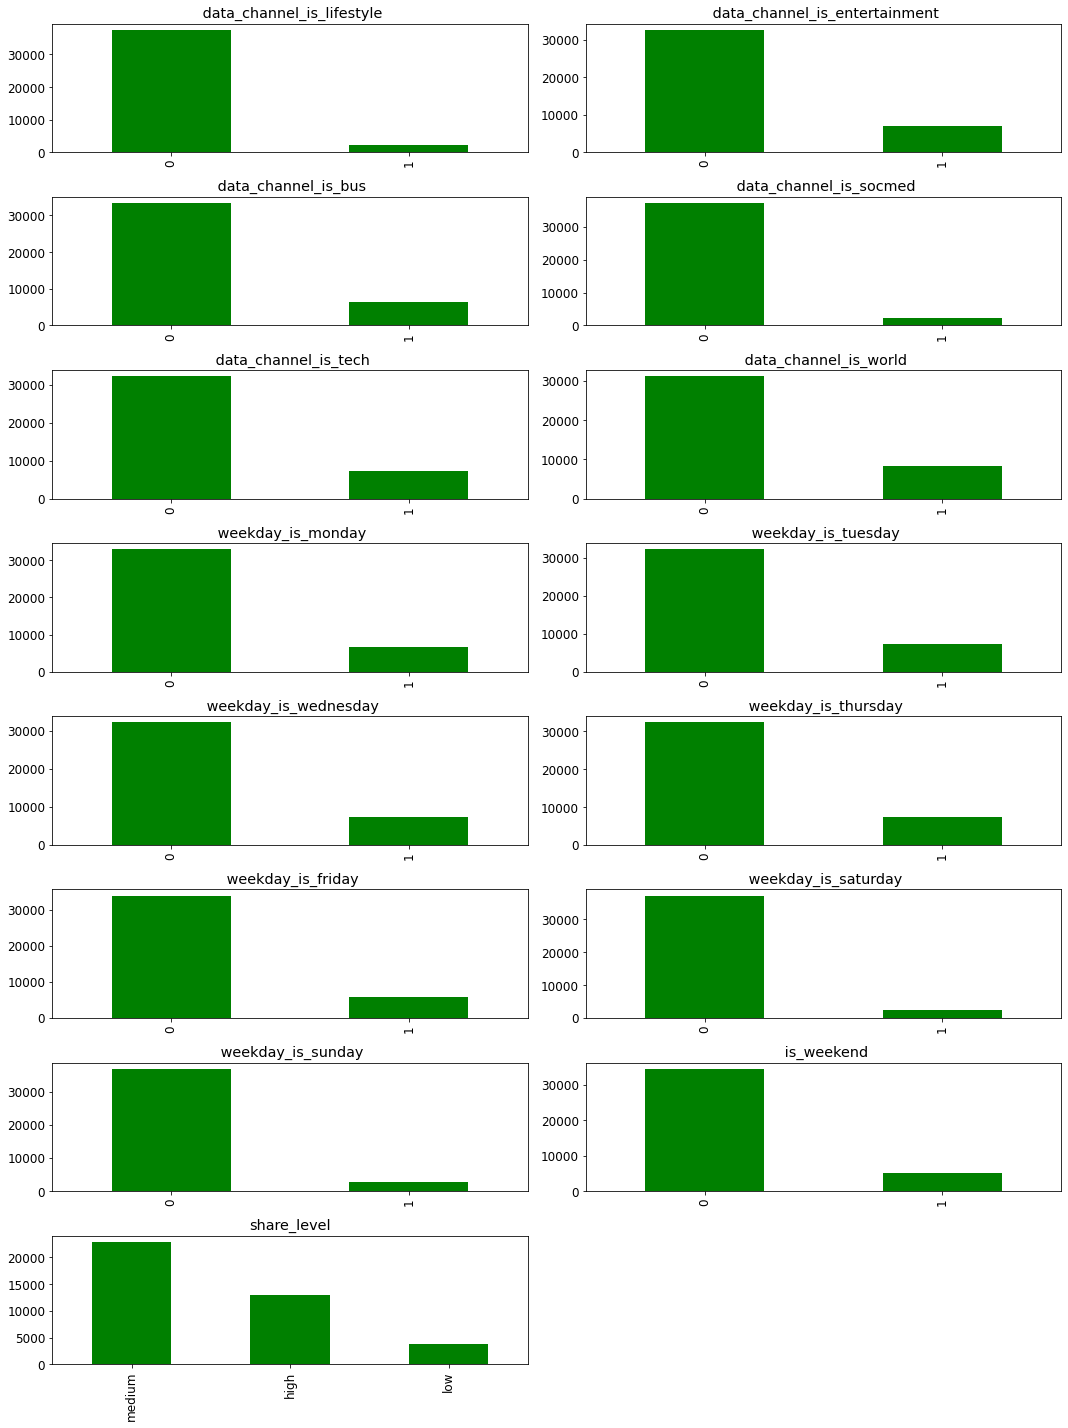

In [24]:
#Set plot parameters
plt.rcParams.update({'font.size': 12,'figure.figsize':(15,20)}) 

#Use an index to identify the spot of the subplot
j=1

#For each categorical column 
for k in col_cat3 :   
    plt.subplot(8,2,j) 
    df2[k].value_counts().plot(kind='bar', color='green');
    plt.title('%s' %k)
    
#Add 1 to go to the next subplot space
    j=j+1 

plt.tight_layout()

#Show results    
plt.show()

The only thing that has changed about the categorical variables is the addition of share_level.  Medium is ~58%, low is ~10%, and high makes up ~33% of the total share_level values.

Plot a histogram for each of our numerical attributes.

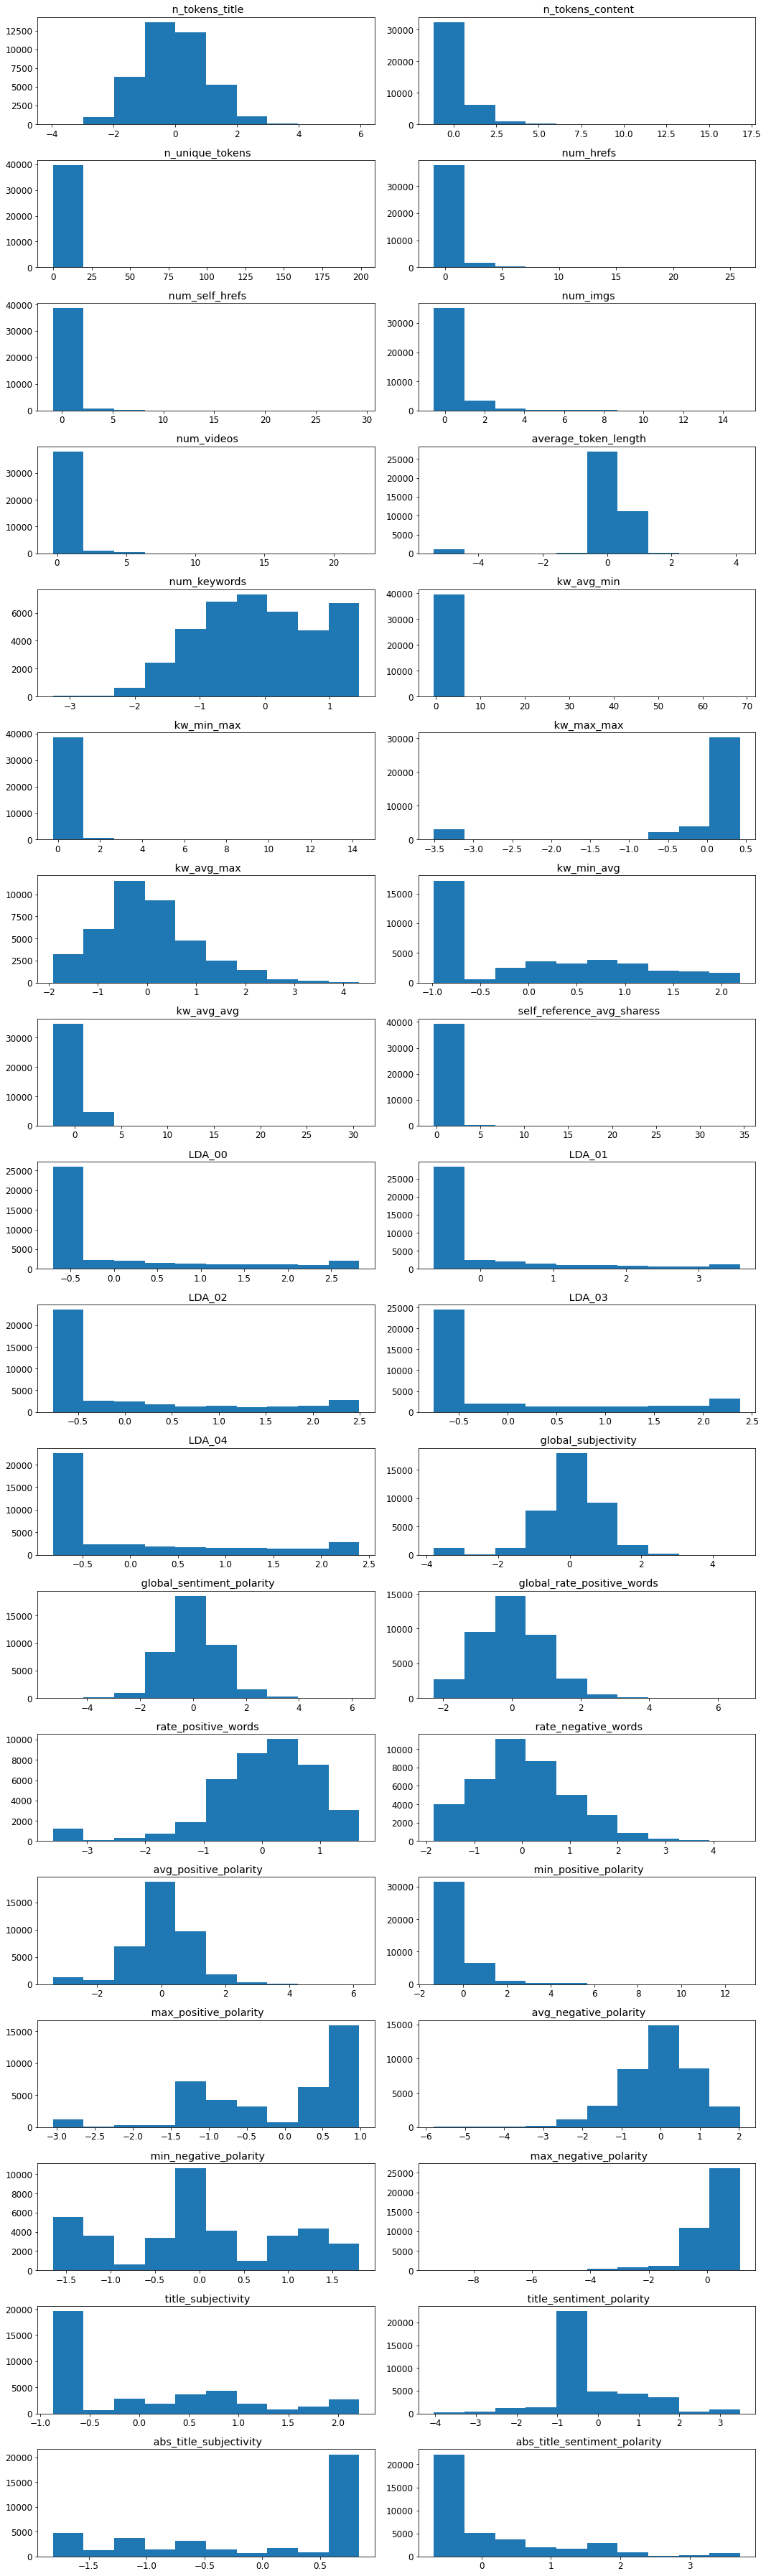

In [25]:
#Set plot parameters
plt.rcParams.update({'font.size': 12,'figure.figsize':(15,50)}) 

#Ignore warnings
np.warnings.filterwarnings('ignore')

#Use an index to identify the spot of the subplot
j=1

#For each numerical column 
for k in col_num3 :   
    plt.subplot(18,2,j) 
    plt.hist(df2[k])
    plt.title('%s' %k)
    j=j+1 

plt.tight_layout()

#Show results    
plt.show()

1) n_tokens_title histogram has large peaks at -1, 0, -2 and 2 with 0 being the mode.<br>
2) n_tokens_content histogram is right skewed with a mode of 0. <br>
3) n_unique_tokens histogram is right skewed with a mode of 0.  <br>

4) num_hrefs histogram is right skewed with a mode of 4. <br>
5) num_self_hrefs histogram is right skewed with a mode of 2. <br>
6) num_imgs boxplot histogram is right skewed with a mode of 1. <br>
7) num_videos boxplot histogram is right skewed with a mode of 0. <br>
8) average_token_length histogram has peak round 0 and a small peak around -5.  The mode is 0. <br>
9) num_keywords boxplot histogram is left skewed with a mode of 0 and high peaks at 0 and 1. <br>

10) kw_avg_min histogram is right skewed with a mode of 0.<br>
11) kw_min_max histogram is right skewed with a mode of 0<br>
12) kw_max_max histogram is left skewed with a mode of 0.25.<br>
13) kw_avg_max histogram is mostly bell-shaped with a mode of 0.<br>
14) kw_min_avg histogram is right skewed with a mode of -1.<br>
15) kw_avg_avg histogram is right skewed with a mode of 0.<br>

16) self_reference_avg_sharess histogram is right skewed with a mode of 0.<br>

17) LDA_00 histogram is right skewed with a mode of -0.5.<br>
18) LDA_01 histogram is right skewed with a mode of -0.5.<br>
19) LDA_02 histogram is right skewed with a mode of -0.5.<br>
20) LDA_03 histogram is right skewed with a mode of -0.5.<br>
22) LDA_04 histogram is right skewed with a mode of -0.5.<br>

22) global_subjectivity is bell-shaped with a mode of 0.<br>
23) global_sentiment_polarity is bell-shaped with a mode of 0.<br>
24) global_rate_positive_words histogram is bell-shaped with a mode of 0.<br>
25) rate_positive_words histogram is mostly bell-shaped but left skewed with several large peaks.  The mode is 0.67 with the next highest peak at 0.<br>
26) rate_negative_words histogram is mostly bell-shaped but right skewed with several large peaks.  The mode is -0.5 with the next highest peak at 0.5.<br>

27) avg_positive_polarity histogram is bell-shaped with a mode of 0.<br>
28) min_positive_polarity histogram has the highest peak at -1.<br>
29) max_positive_polarity histogram shows a mode of 1 and the next highest peak at 0.5.<br>
30) avg_negative_polarity histogram is bell-shaped with a left skew.  The mode is 0.<br>
31) min_negative_polarity histogram shows a mode of -0.25. <br>
32) max_negative_polarity histogram shows a mode of -0. <br>

33) title_subjectivity histogram shows a mode of -0.75. <br>
34) title_sentiment_polarity histogram shows a mode of -1. <br>
35) abs_title_subjectivity histogram shows a mode of 0.5. <br>
36) abs_title_sentiment_polarity histogram shows a mode -0.5. <br>

We will now check the boxplots for outliers.

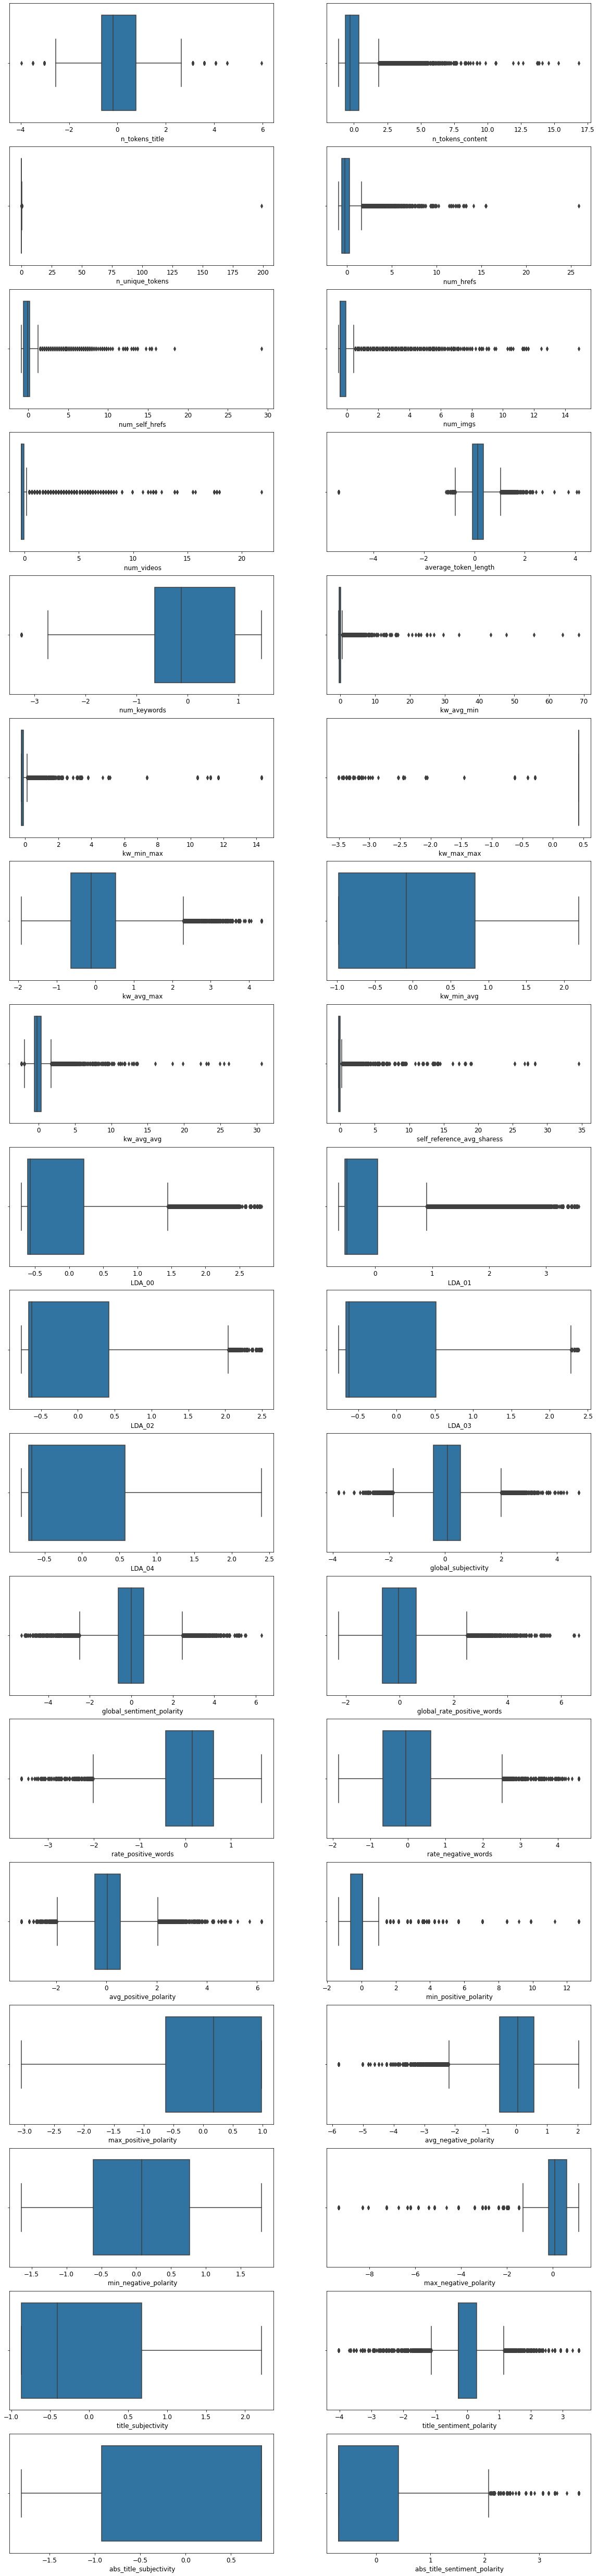

In [26]:
#Define a figure to which we will add a boxplot for each of our attributes
plt.figure(figsize=(20,90))

#Ignore warnings
np.warnings.filterwarnings('ignore')

#Use an index to identify the spot of the subplot
j=1

#For each numeric variable display a boxplot
for k in col_num3 :    
    plt.subplot(18,2,j) 
    sns.boxplot(x=k, data=df2);
    j=j+1

#Show results    
plt.show()

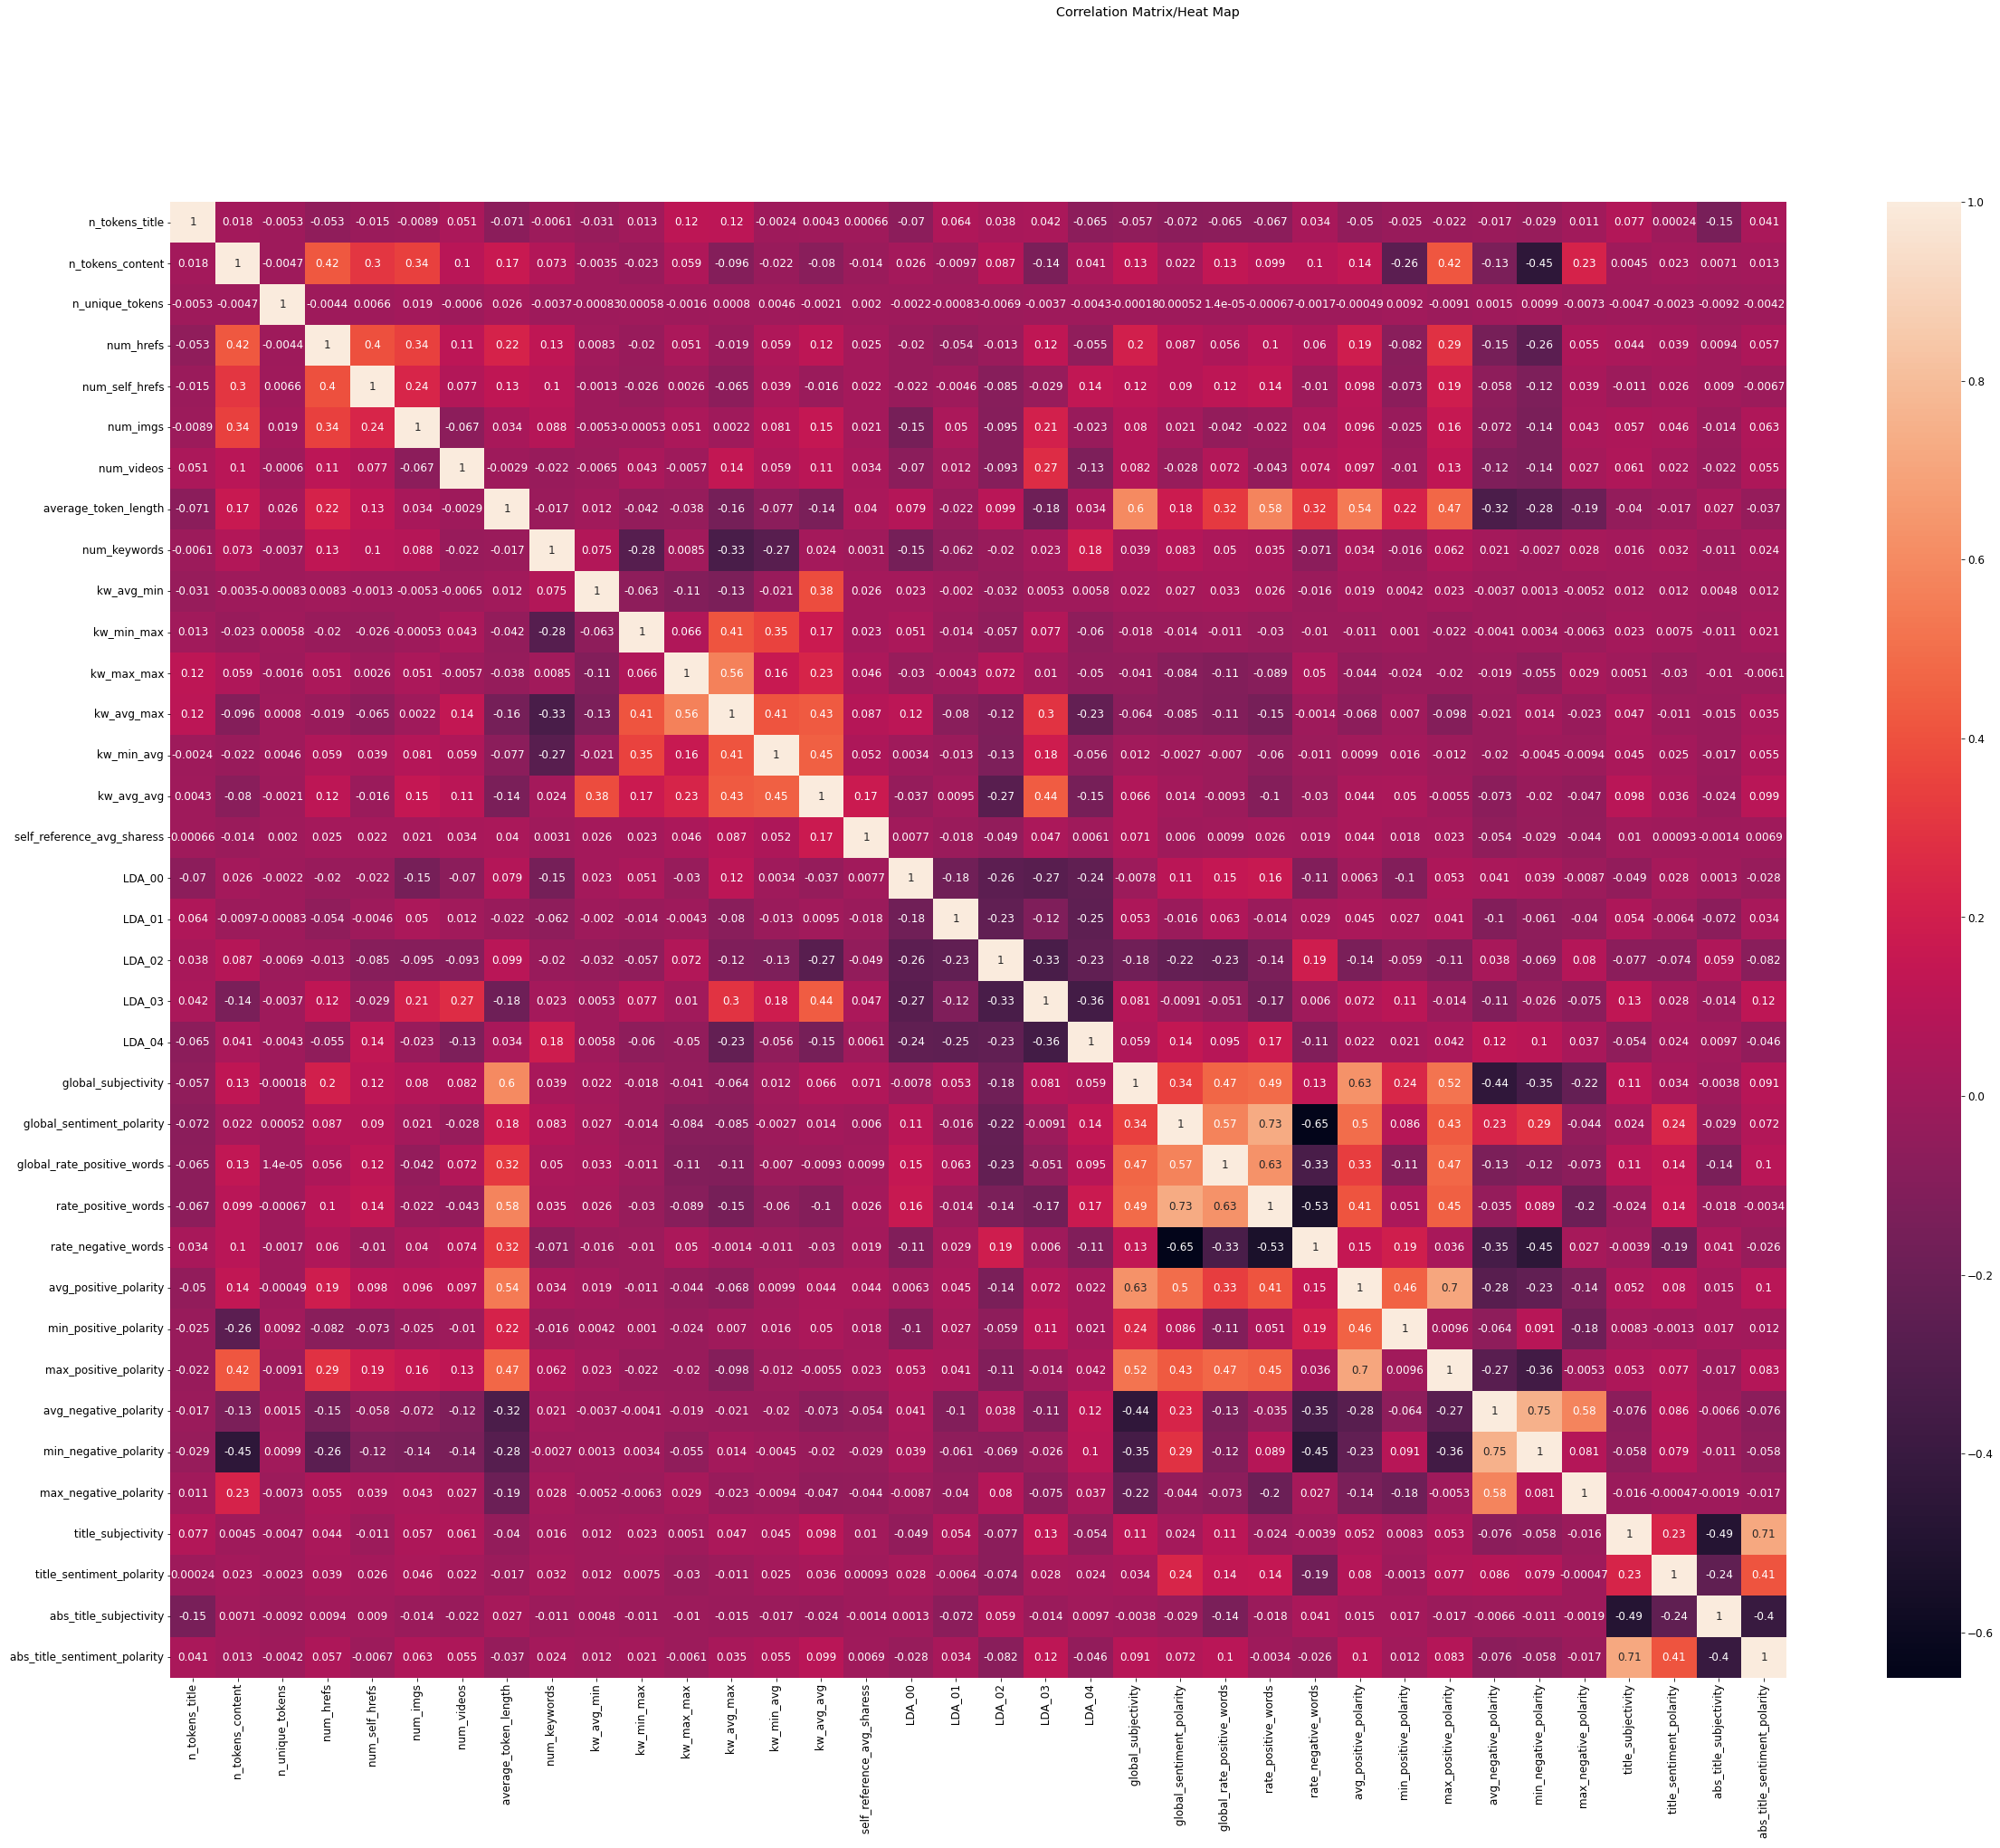

In [27]:
#Graph heat map for correlation
corr_num2=df2[col_num3].corr()
fig = plt.figure(figsize=(40, 30))
sns.heatmap(corr_num2, annot=True);
fig.suptitle('Correlation Matrix/Heat Map') 
plt.show()

<b>Preliminary predictive inferences<b>

Compare the numerical attributes to the predictor, share_level.

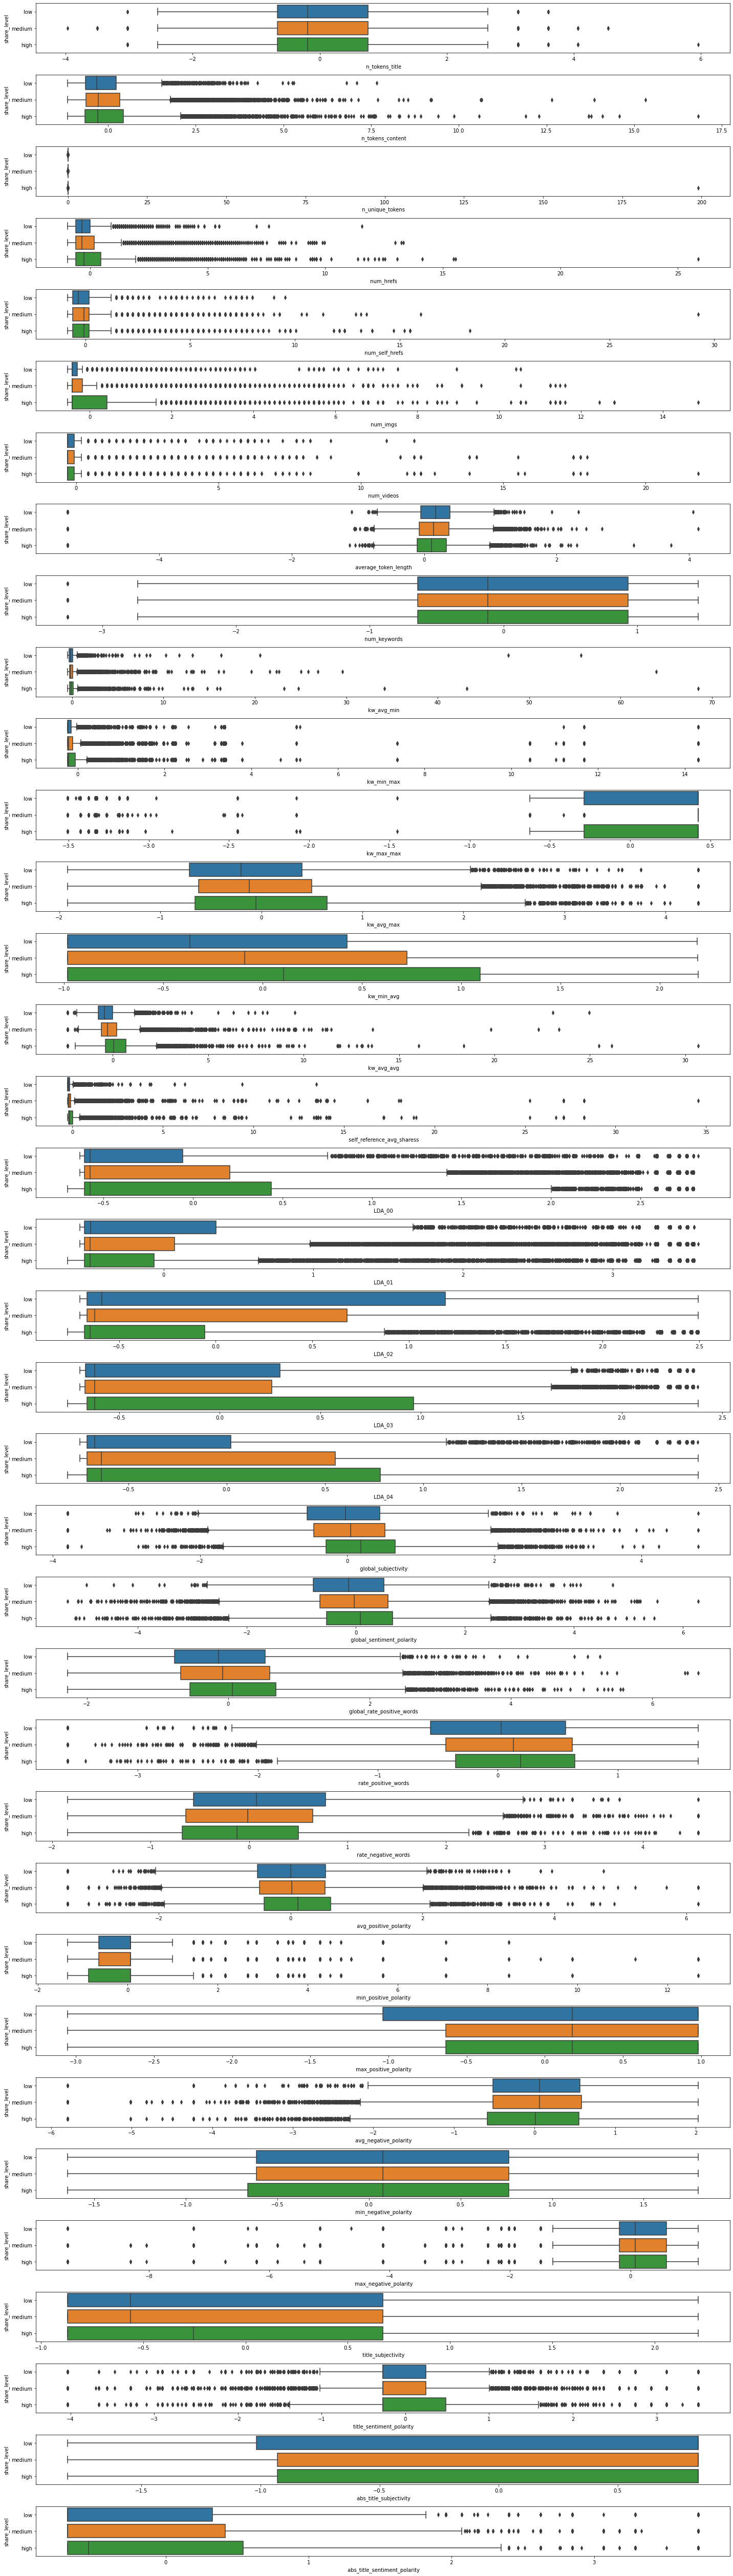

In [28]:
#Set plot parameters
plt.rcParams.update({'font.size': 10,'figure.figsize':(20,70)}) 

#Use an index to identify the spot of the subplot
j=1

#For each categorical attribute
for k in df2[col_num3].columns.to_list():    
    plt.subplot(36,1,j) 
    sns.boxplot(data=df2, x=k, y=df2['share_level'])
    j=j+1

plt.tight_layout()

#Show results    
plt.show()

From the box plots we would expect the following attributes to be more predictive:

n_tokens_content<br>
num_hrefs<br>
num_self_hrefs<br>
averge_token_length<br>
kw_max_max<br>
kw_avg_max<br>
kw_min_avg<br>
kw_avg_avg<br>
LDA_02<br>
LDA_04<br>
global_subjectivity<br>
global_sentiment_polarity<br>
global_rate_positive_words<br>
rate_postive_words<br>
rate_negative_workds<br>

Compare the categorical attributes to the predictor, share_level.

In [29]:
col_cat4=[' data_channel_is_lifestyle', ' data_channel_is_entertainment', ' data_channel_is_bus', ' data_channel_is_socmed', 
         ' data_channel_is_tech', ' data_channel_is_world', ' weekday_is_monday', ' weekday_is_tuesday', 
         ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday', 
         ' weekday_is_sunday', ' is_weekend']

#Import stats module to perform chi-square
from scipy import stats

#Perform chi-square test
chi_sq=[]
for i in range(0,14):
    chi_sq.append([stats.chi2_contingency(pd.crosstab(df2['share_level'], df2[col_cat4].iloc[:,i]))[0:2],i])
    
#Chi_sq
chi_sq.sort(reverse=True)
chi_sq

[[(810.6290535777209, 9.421880254751714e-177), 5],
 [(656.5167285931796, 2.7491836183727694e-143), 13],
 [(394.17238171011246, 2.5500861487716435e-86), 1],
 [(361.43224188190044, 3.280846294001478e-79), 3],
 [(327.50174783377565, 7.654186696195208e-72), 11],
 [(293.98000849173707, 1.4556342346510094e-64), 4],
 [(289.47001788841794, 1.3879834167348975e-63), 12],
 [(69.34034124563415, 8.768720188221238e-16), 7],
 [(68.54778879859066, 1.303277174282949e-15), 8],
 [(43.520152992284814, 3.5458376896286463e-10), 0],
 [(32.64829596483641, 8.137904883242923e-08), 9],
 [(28.439184007943417, 6.67589746535197e-07), 10],
 [(23.1980835458164, 9.174875139333773e-06), 2],
 [(14.83350530285519, 0.00060109795415456), 6]]

The chi-square test tells us the following attributes should be more predictive of share_level:<br>
Column 5 - data_channel_is_world <br>
Column 13 - is_weekend <br>
Column 1 - data_channel_is_entertainment <br>
Column 3 - data_channel_is_socmed <br>

Yellowbrick feature importance

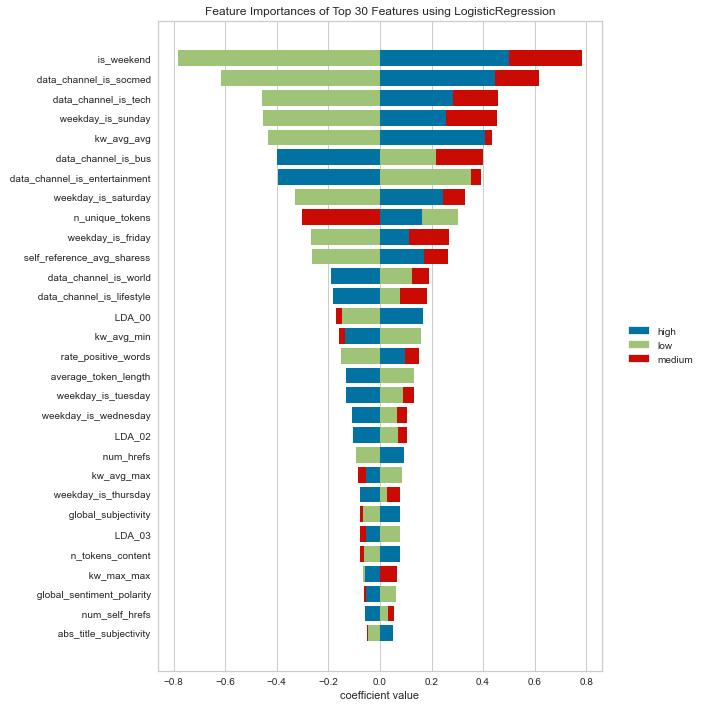

<AxesSubplot:title={'center':'Feature Importances of Top 30 Features using LogisticRegression'}, xlabel='coefficient value'>

In [30]:
from yellowbrick.model_selection import FeatureImportances
from sklearn.linear_model import LogisticRegression

X1 = df2.drop(['share_level'], axis=1)
y1 = df2.share_level

lr = LogisticRegression(random_state=42)
fig, ax = plt.subplots(figsize=(10, 10))
fi_viz = FeatureImportances(lr, stack=True, relative=False, topn=30)
fi_viz.fit(X1, y1)
fi_viz.poof()

Generating list of our top predictors to use in our models

In [31]:
predictors = [' is_weekend', ' data_channel_is_socmed', ' data_channel_is_tech', ' weekday_is_sunday', ' kw_avg_avg', 
              ' data_channel_is_bus', ' data_channel_is_entertainment', ' weekday_is_saturday', ' n_unique_tokens',
              ' weekday_is_friday', ' self_reference_avg_sharess', ' data_channel_is_world', ' data_channel_is_lifestyle', ' LDA_00', ' kw_avg_min', ' rate_positive_words', ' average_token_length',
              ' weekday_is_tuesday', ' weekday_is_wednesday', ' LDA_02', ' num_hrefs', ' kw_avg_max', ' weekday_is_thursday', ' global_subjectivity', ' LDA_03', ' n_tokens_content', ' kw_max_max', ' global_sentiment_polarity',
              ' num_self_hrefs', ' abs_title_subjectivity']

In [32]:
#Prepare data for classification process
#Use 33% data to train 
#Use random state number 20 to make sure result is fixed 

from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=20)

#### Calculate null error rate

In [33]:
#Null error rate
NRE = df2.share_level.value_counts()[1]/(df2.share_level.value_counts()[0] + df2.share_level.value_counts()[1])
Error_Rate = 1 - NRE
Error_Rate

0.6387138156060015

In [34]:
#Training null error rate
training1_NRE = y_train.value_counts()[1]/(y_train.value_counts()[0] + y_train.value_counts()[1])
Null_Error_Rate= 1 - training1_NRE
Null_Error_Rate

0.5000488742628132

Our null error rate was previously 63.9% when share_level was imbalanced.  Now that we have applied SMOTE, the null error rate is 50% which is what we would expect.

In [35]:
#Select variables for model
X1_train = X_train[predictors]
y1_train = y_train

X1_test = X_test[predictors]
y1_test = y_test

<h3><b> Neural Network Modeling</b></h3>

Checking the default parameters in the neural network model.<br>
Sources: https://docs.python.org/3/library/pprint.html<br>
https://towardsdatascience.com/what-are-hyperparameters-and-how-to-tune-the-hyperparameters-in-a-deep-neural-network-d0604917584a

In [36]:
#Print all the default parameters in the Neural Network model
from sklearn.neural_network import MLPClassifier
from pprint import pprint

#Use MLPClassifier
classifier_default = MLPClassifier()

#Check the default parameters 
print('Default Parameters:')
pprint(classifier_default.get_params())

Default Parameters:
{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}


<b>Model 1<b>

Model 1 will use all the default parameters.

In [37]:
#Initializing the MLPClassifier
model1 = MLPClassifier()

#Fitting the training data
model1.fit(X1_train, y1_train)

MLPClassifier()

In [38]:
#Predict
yd_train_pred = model1.predict(X1_train)

In [39]:
#Evaluate the model using 5-fold cross-validation
scores1 = cross_val_score(model1, X1_train, y1_train, scoring='accuracy', cv=5)
print(scores1)
cv1 = scores1.mean()
print("cv_scores_mean:", cv1)

[0.61127403 0.60986206 0.61453242 0.61236016 0.60790703]
cv_scores_mean: 0.6111871402193982


In [40]:
#Print metrics
from sklearn.metrics import confusion_matrix, f1_score, classification_report, precision_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics

print(confusion_matrix(y1_train, yd_train_pred))
print(classification_report(y1_train, yd_train_pred))

[[ 8962  2114  4271]
 [ 1289 11790  2265]
 [ 3173  2367  9804]]
              precision    recall  f1-score   support

        high       0.67      0.58      0.62     15347
         low       0.72      0.77      0.75     15344
      medium       0.60      0.64      0.62     15344

    accuracy                           0.66     46035
   macro avg       0.66      0.66      0.66     46035
weighted avg       0.66      0.66      0.66     46035



<b>Model 2<b>

Tune hyperparameters by using RandomizedSearchCV <br>
Source: https://towardsdatascience.com/hyperparameter-tuning-c5619e7e6624

In [41]:
param = {
    'activation' : ['relu', 'identity', 'logistic', 'tanh'],
    'solver' : ['sgd', 'adam', 'lbfgs'],
    'hidden_layer_sizes': [(100,),(200,),(300,),(400,),(500,),(600,)],
    'max_iter': [100, 200, 300, 400, 500],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5],
    'learning_rate': ["constant", "invscaling", "adaptive"],
}

In [44]:
#from sklearn.model_selection import RandomizedSearchCV 
#from sklearn.neural_network import MLPClassifier

#Instantiating RandomizedSearchCV object 
#clf = RandomizedSearchCV(MLPClassifier(random_state=420), param, cv=5,
#                           scoring='accuracy')

#clf.fit(X1_train, y1_train.values.ravel()) 

#print("The parameters: {}".format(clf.best_params_))

In [45]:
#Model 2 with tuned parameters 

model2 = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(500,), learning_rate='invscaling',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

model2.fit(X1_train,y1_train.values.ravel())

MLPClassifier(hidden_layer_sizes=(500,), learning_rate='invscaling',
              max_iter=500, random_state=0, solver='lbfgs')

In [46]:
#Predict
y2_train_pred = model2.predict(X1_train)

In [47]:
#Evaluate the model using 5-fold cross-validation
scores2 = cross_val_score(model2, X1_train, y1_train, scoring='accuracy', cv=5)
print(scores2)
cv2 = scores2.mean()
print("cv_scores_mean:", cv2)

[0.64005648 0.63994787 0.64005648 0.63375692 0.63451722]
cv_scores_mean: 0.6376669925057022


In [48]:
#Print metrics
print(confusion_matrix(y1_train, y2_train_pred))
print(classification_report(y1_train, y2_train_pred))

[[11766  1003  2578]
 [  533 13923   888]
 [ 2510  1359 11475]]
              precision    recall  f1-score   support

        high       0.79      0.77      0.78     15347
         low       0.85      0.91      0.88     15344
      medium       0.77      0.75      0.76     15344

    accuracy                           0.81     46035
   macro avg       0.81      0.81      0.81     46035
weighted avg       0.81      0.81      0.81     46035



<b>Model 3<b>

In [ ]:
#Prepared required library
!pip install keras_metrics
!pip install tensorflow 

In [49]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense

In [50]:
y1_train.to_numpy()

array(['low', 'medium', 'high', ..., 'low', 'medium', 'medium'],
      dtype=object)

In [51]:
#Format all fields as string
X = X1_train.astype(str)

#Reshape target to be a 2d array
y = y1_train.values.reshape((len(y1_train), 1))
print(X)
print(y)

       is_weekend  data_channel_is_socmed  data_channel_is_tech  \
37242           0                       0                     0   
10166           0                       0                     1   
2577            0                       0                     0   
62589           0                       0                     0   
20699           0                       0                     0   
...           ...                     ...                   ...   
3915            1                       0                     1   
47497           0                       0                     0   
31962           0                       0                     0   
23775           0                       0                     0   
37135           0                       0                     0   

       weekday_is_sunday            kw_avg_avg  data_channel_is_bus  \
37242                  0  -0.08504713733776584                    0   
10166                  0   -0.5220542250599853       

In [52]:
#Prepare input data
ohe = OneHotEncoder()
ohe.fit(X1_train)
X1_train_enc = ohe.transform(X1_train)

In [53]:
#Prepare target
le = LabelEncoder()
le.fit(y1_train)
y1_train_enc = le.transform(y1_train)

In [ ]:
from keras.layers import Dense, Dropout, Activation

#Define the  model
model = Sequential()
model.add(Dense(64, input_dim=X1_train_enc.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='softmax'))

#Compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Fit the keras model on the dataset
model.fit(X1_train_enc, y1_train_enc, epochs=20, batch_size=16, verbose=2)

#Evaluate the keras model
_, accuracy = model.evaluate(X1_train_enc, y1_train_enc, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/20


In [ ]:
#Predict
m3_pred = model.predict(X1_train_enc)

In [ ]:
#Evaluate the model using 5-fold cross-validation
scores3 = cross_val_score(model, X1_train_enc, y1_train_enc, scoring='accuracy', cv=5)
print(scores3)
cv3 = scores3.mean()
print("cv_scores_mean:", cv3)

In [ ]:
#Print metrics
print(confusion_matrix(y1_train_enc, m3_pred))
print(classification_report(y1_train_enc, m3_pred))

A summary of all the models' performance can be seen below.

| Metrics            | Model 1  | Model 2    | Model 3                   |
|--------------------|----------|------------|---------------------------|
| activation         | relu     | relu       | softmax                   |
| solver             | adam     | lbfgs      | -                         |
| hidden layer sizes | 100      | 500        | -                         |
| max_iter           | 200      | 500        | -                         |
| learning rate      | constant | invscaling | -                         |
| loss               | -        | -          | categorical cross entropy |
| epochs             | -        | -          | 20                        |
| optimizer          | -        | -          | sgd                       |
| precision          | 0.66     | 0.80       | 0.33                      |
| recall             | 0.66     | 0.80       | 0.33                      |
| f1 score           | 0.66     | 0.80       | 0.33                      |
| accuracy           | 0.66     | 0.80       | 0.33                      |
| avg cv score       | 0.61     | 0.80       | 0.33                      |

<h3>Selected Model</h3>

We will apply the testing data to Model 2 since it has the highest accuracy, precision, recall, and F1 score across all models.

In [57]:
#Predict values using test data and model 2.
results = model2.predict(X1_test)

In [58]:
#Import confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y1_test, results)
print('Confusion Matrix\n')
print(confusion)

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y1_test, results))

Confusion Matrix

[[4538  836 2182]
 [ 614 6085  860]
 [2178 1187 4194]]

Classification Report

              precision    recall  f1-score   support

        high       0.62      0.60      0.61      7556
         low       0.75      0.81      0.78      7559
      medium       0.58      0.55      0.57      7559

    accuracy                           0.65     22674
   macro avg       0.65      0.65      0.65     22674
weighted avg       0.65      0.65      0.65     22674



Our test data applied to Model 2 has:

- an accuracy score of 65%
- a weighted average precision score of 65%
- a weighted average recall score of 65%
- a weighted average F1 score of 65%

This model did well on our testing data.  We would expect the testing data metrics to be less than the training data metrics for this model.

| Metrics           |Model 2 - Train|Model 2 - Test|
|-------------------|------------|-----------|
| Weighted Accuracy |0.81       |0.65       |
| Weighted Precision|0.81        |0.65       |
| Weighted Recall   |0.81        |0.65       |
| Weighted F1 Score |0.81        |0.65       |

<h3>Conclusion</h3>

After preparing our data, we found the best results came from model 2 which utilized 30 top predictors optimized with an activation of relu, solver of lbfgs, a hidden layer size of 500, a max_iter size of 500, and a learning rate of invscaling.

The training data produced an accuracy, precision, recall, and F1 score of 81%. Model 2 did well at predicting which categorical values (low, medium, high) is most likely to apply to a given observation. 

When the model was applied to the previously unseen testing data, it had an accuracy of 65%, precision of 65%, recall of 65%, and an F1 score of 65%.  The null error rate was 63% so Model 2 only did slightly better than the null error rate when applied to previously unseen testing data.